# 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import koreanize_matplotlib    # 한글 깨짐 방지

import math

%matplotlib inline

# 데이터 로드

In [2]:
data1 = pd.read_csv("종목 학교리스트_data.csv", encoding="utf-8")
data1 = data1.drop("연도", axis=1)

data2 = pd.read_csv("체육시설 학교리스트_data.csv", encoding="utf-8")
data2 = data2.drop("연도", axis=1)

data3 = pd.read_csv("서울시 초중고.csv", encoding="cp949")

In [3]:
data3.tail(3)

,학교,설립형태,본교분교구분,소재지지번주소,소재지도로명주소,교육지원청명,위도,경도
383,내곡중학교,공립,본교,서울특별시 서초구 신원동 324,서울특별시 서초구 청계산로7길 9-20,서울특별시강남서초교육지원청,37.451982,127.054783
384,시흥중학교,공립,본교,서울특별시 금천구 시흥동 산24-15,서울특별시 금천구 시흥대로38길 60,서울특별시남부교육지원청,37.445793,126.905416
385,해누리중학교,공립,본교,서울특별시 송파구 가락동 479-1,서울특별시 송파구 송파대로37길 95,서울특별시강동송파교육지원청,37.498245,127.102192


# feature engineering

### 1. data1. 학교&스포츠클럽 종목별 참여학생수, 참여 학생 총 활동 시간, 등록학생수 계

In [14]:
data1[(data1["컬럼명"] == "참여 학생 총 활동 시간") & (data1["측정값"] == 0)]

,학교,종목,컬럼명,측정값
144,경희중학교,야구,참여 학생 총 활동 시간,0
376,노곡중학교,축구,참여 학생 총 활동 시간,0
553,동국대학교사범대학부속중학교,축구,참여 학생 총 활동 시간,0
1096,서울문영여자중학교,플라잉디스크,참여 학생 총 활동 시간,0
1097,서울문영여자중학교,넷볼,참여 학생 총 활동 시간,0
1258,세곡중학교,배드민턴,참여 학생 총 활동 시간,0
1260,세곡중학교,농구,참여 학생 총 활동 시간,0
1439,신길중학교,풋살,참여 학생 총 활동 시간,0


In [4]:
idx = data1[(( data1["학교"] == "경희중학교" ) & ( data1["종목"] == "야구" )) |
      (( data1["학교"] == "노곡중학교" ) & ( data1["종목"] == "축구" )) |
      (( data1["학교"] == "동국대학교사범대학부속중학교" ) & ( data1["종목"] == "축구" )) |
      (( data1["학교"] == "서울문영여자중학교" ) & ( data1["종목"] == "플라잉디스크" )) |
      (( data1["학교"] == "서울문영여자중학교" ) & ( data1["종목"] == "넷볼" )) |
      (( data1["학교"] == "세곡중학교" ) & ( data1["종목"] == "배드민턴" )) |
      (( data1["학교"] == "세곡중학교" ) & ( data1["종목"] == "농구" )) |
      (( data1["학교"] == "신길중학교" ) & ( data1["종목"] == "풋살" ))].index

data1 = data1.drop(idx).reset_index(drop=True)

In [5]:
tmp = data1[data1["컬럼명"] == "참여학생수"][["학교", "종목", "측정값"]].reset_index(drop=True).rename(columns={"측정값": "참여학생수"})

tmp["등록학생수"] = data1[data1["컬럼명"] == "등록학생수 계"]["측정값"].reset_index(drop=True)
tmp["등록률( % )"] = ( tmp["등록학생수"] / tmp["참여학생수"] ) * 100

idx = tmp[tmp["등록률( % )"] > 100].index

data1 = tmp.drop(idx).reset_index(drop=True)[["학교", "종목"]]

data1.head(3)

,학교,종목
0,가락중학교,피구
1,가락중학교,축구
2,가산중학교,배구


In [6]:
data1.tail(3)

,학교,종목
813,휘경중학교,배구
814,휘경중학교,365+체육온활동
815,휘문중학교,축구


### 2. data2. 학교별 체육시설 보유 수

In [7]:
data2 = data2[( data2["체육시설"] != "철봉및평행봉" ) &
     ( data2["체육시설"] != "멀리뛰기") &
     ( data2["체육시설"] != "기타") ].reset_index(drop=True)

data2 = data2.replace({"대형운동장": "운동장",
                      "중형운동장": "운동장",
                      "소형운동장": "운동장"})

In [8]:
data2.head(3)

,학교,체육시설,보유수
0,가락중학교,펜싱장,1
1,가락중학교,족구장,1
2,가락중학교,정규체육관,1


In [9]:
data2.tail(3)

,학교,체육시설,보유수
1839,휘문중학교,체력단련장,1
1840,휘문중학교,운동장,1
1841,휘문중학교,골프연습장,1


### 3. data3. 서울시 중학교 소재

In [10]:
for idx, row in data3.iterrows():
    data3.at[idx, "자치구"] = row["소재지지번주소"].split()[1]

In [11]:
data3 = data3[["학교", "위도", "경도", "자치구"]]

data3.head(3)

,학교,위도,경도,자치구
0,남서울중학교,37.481795,126.921459,관악구
1,봉은중학교,37.519105,127.062759,강남구
2,선유중학교,37.532843,126.894329,영등포구


In [12]:
data3.tail(3)

,학교,위도,경도,자치구
383,내곡중학교,37.451982,127.054783,서초구
384,시흥중학교,37.445793,126.905416,금천구
385,해누리중학교,37.498245,127.102192,송파구


# 스포츠클럽 종목별 활성화율

### 활성화율( % ) = ( 특정 종목을 진행하는 학교 수 / 전체 종목을 진행하는 학교 수 ) * 100

In [13]:
sportsclub_df = data1.groupby(["종목"])[["학교"]].count().sort_values(by="학교", ascending=False).reset_index()

sportsclub_df_club = sportsclub_df.replace({"기타(其他)": "기타",
                                           "수(手)족구": "수족구"})

sportsclub_df["활성화율"] = ( sportsclub_df["학교"] / sportsclub_df["학교"].sum() ) * 100

sportsclub_df.head(3)

,종목,학교,활성화율
0,축구,162,19.852941
1,농구,140,17.156863
2,배드민턴,125,15.318627


# 자치구별, 학교별 체육시설

In [14]:
school_df = data2.merge(data3, on="학교", how="inner")

school_df.head(3)

,학교,체육시설,보유수,위도,경도,자치구
0,가락중학교,펜싱장,1,37.502217,127.118366,송파구
1,가락중학교,족구장,1,37.502217,127.118366,송파구
2,가락중학교,정규체육관,1,37.502217,127.118366,송파구


# 자치구별, 학교별 스포츠클럽 종목

In [15]:
school_df2 = data1.merge(data3, on="학교", how="inner").reset_index(drop=True)

school_df2 = school_df2.rename(columns={"종목": "스포츠클럽 종목"})

school_df2.head(3)

,학교,스포츠클럽 종목,위도,경도,자치구
0,가락중학교,피구,37.502217,127.118366,송파구
1,가락중학교,축구,37.502217,127.118366,송파구
2,가산중학교,배구,37.468374,126.894362,금천구


# 자치구별 스포츠클럽 종목 개수

In [16]:
gu_sports_df = data1.merge(data3, on="학교", how="inner").groupby(["자치구", "종목"])[["학교"]].count().reset_index()

gu_sports_df.head(3)

,자치구,종목,학교
0,강남구,365+체육온활동,4
1,강남구,농구,12
2,강남구,배구,7


# 자치구별, 스포츠클럽 종목별 활성화율 막대 그래프
* 스포츠클럽 종목의 몰개성화 확인 가능

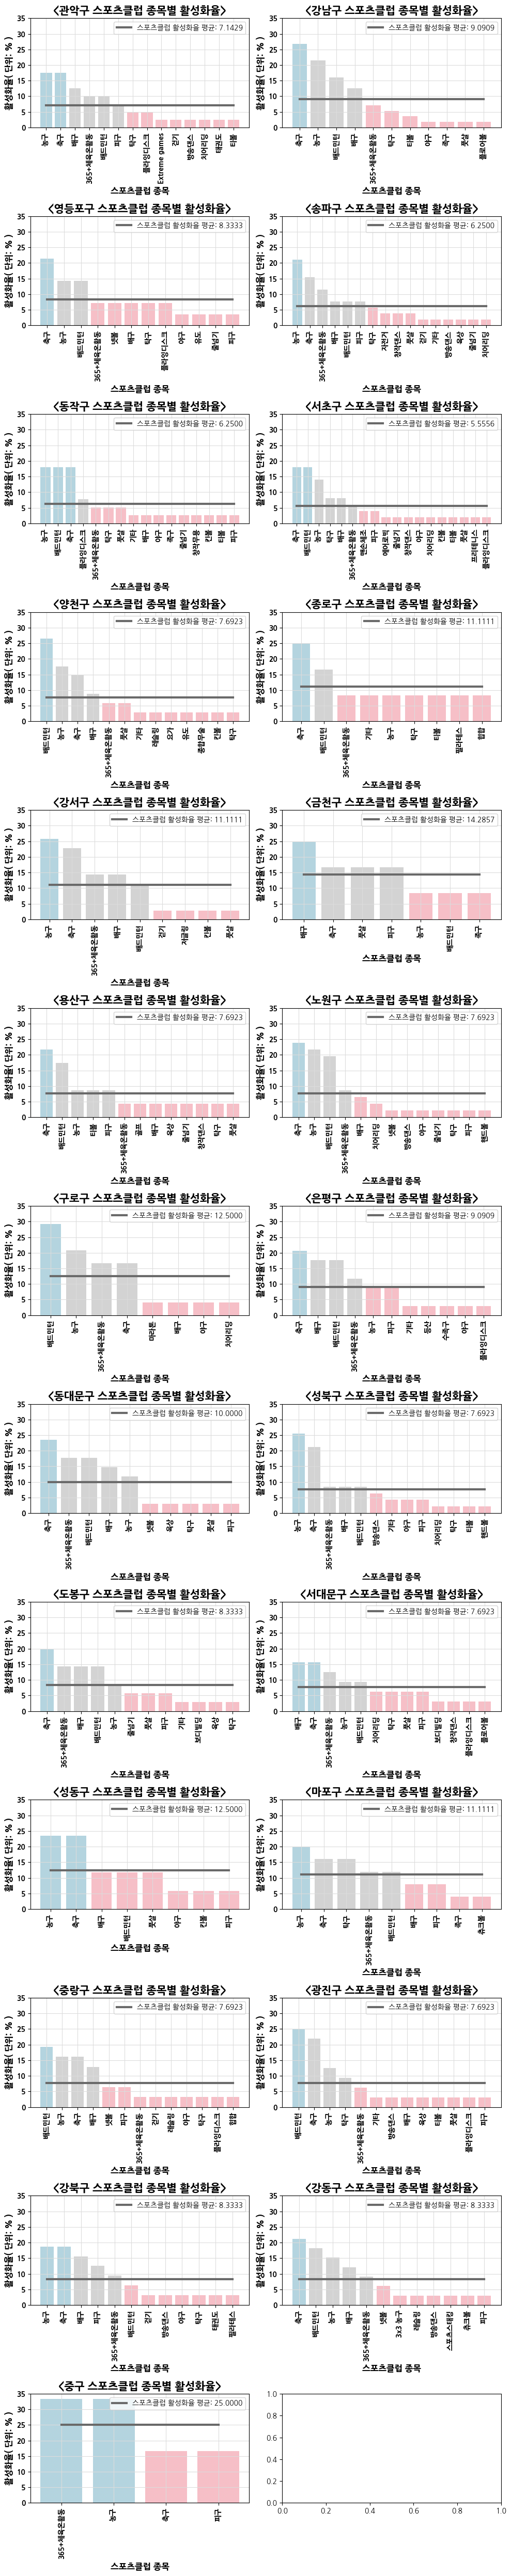

In [17]:
gu_tmp = list(data3["자치구"].unique())

fig, ax = plt.subplots(nrows=len(gu_tmp)//2+1, ncols=2, figsize=(10, 50))

fig.patch.set_facecolor('none')  # 배경을 투명하게 설정

x, y = 0, 0
for gu in gu_tmp:
    tmp = gu_sports_df[gu_sports_df["자치구"] == gu].sort_values(by="학교", ascending=False)
    
    tmp = tmp.replace("기타(其他)", "기타")
    tmp = tmp.replace("수(手)족구", "수족구")
    
    tmp["스포츠클럽 종목별 활성화율"] = ( tmp["학교"] / tmp["학교"].sum() ) * 100
    
    palette = ["lightblue" if value == tmp["스포츠클럽 종목별 활성화율"].max() else "lightpink"
               if value < tmp["스포츠클럽 종목별 활성화율"].mean() else "lightgray" for value in tmp["스포츠클럽 종목별 활성화율"]]
    
    sns.barplot(data=tmp, x="종목", y="스포츠클럽 종목별 활성화율", palette=palette, ax=ax[x][y])
    
    mean_data = [tmp["스포츠클럽 종목별 활성화율"].mean() for _ in range(len(tmp))]
    
    ax[x][y].plot(mean_data, color="dimgray", linewidth=3, label="스포츠클럽 활성화율 평균: %.4f"%mean_data[0])
    
    ax[x][y].patch.set_facecolor('none')    # 배경을 투명하게 설정
    
    ax[x][y].set_title(f"<{gu} 스포츠클럽 종목별 활성화율>", fontweight="bold", fontsize=15)
    ax[x][y].set_xlabel('스포츠클럽 종목', fontweight="bold", fontsize=12)
    ax[x][y].set_ylabel('활성화율( 단위: % )', fontweight="bold", fontsize=12)
    
    ax[x][y].set_xticklabels(ax[x][y].get_xticklabels(), rotation=90, fontweight="bold")
    ax[x][y].set_yticks(range(0, 36, 5))
    ax[x][y].set_yticklabels(range(0, 36, 5), fontweight="bold")
    
    ax[x][y].grid(color="gainsboro")
    ax[x][y].legend(loc="best")
    
    y = (y + 1) % 2
    if y % 2 == 0:
        x += 1
    
plt.tight_layout()    # subplot 간 간격 조정

# 2019-2023 연도별, 학교별 스포츠클럽 종목 수( 코로나로 2019년 제외 )
### 2019-2023 학교별 스포츠클럽 종목 수 merge 후 concat

* 시간이 흘러도, 종목의 수가 절대적으로 부족한 점은 해결되지 않았다는 점 확인 가능
* 학교별 종목의 수에 따른 약간의 편차 확인 가능

In [18]:
school_df2023 = school_df2.groupby(["학교"])[["스포츠클럽 종목"]].count().reset_index()
school_df2023["년도"] = [2023 for _ in range(len(school_df2023))]

school_df2023.head(3)

,학교,스포츠클럽 종목,년도
0,가락중학교,2,2023
1,가산중학교,1,2023
2,가원중학교,5,2023


In [19]:
school_all_df = school_df2023
school_all_df.head(3)

,학교,스포츠클럽 종목,년도
0,가락중학교,2,2023
1,가산중학교,1,2023
2,가원중학교,5,2023


### 1. data2022

In [20]:
data2022 = pd.read_csv("2022종목 학교리스트_data.csv", encoding="utf-8")

In [21]:
idx = data2022[(( data2022["학교"] == "관악중학교" ) & ( data2022["종목"] == "기타(其他)")) |
         (( data2022["학교"] == "한산중학교") & (data2022["종목"] == "배드민턴"))].index

data2022 = data2022.drop(idx).reset_index(drop=True)

In [22]:
tmp = data2022[data2022["컬럼명"] == "참여학생수"][["학교", "종목", "측정값"]].reset_index(drop=True).rename(columns={"측정값": "참여학생수"})

tmp["등록학생수"] = data2022[data2022["컬럼명"] == "등록학생수 계"].reset_index(drop=True)["측정값"]

tmp["등록률( % )"] = ( tmp["등록학생수"] / tmp["참여학생수"] ) * 100

idx = tmp[tmp["등록률( % )"] > 100].index

data2022 = tmp.drop(idx)[["학교", "종목"]].reset_index(drop=True)

In [23]:
data2022 = data2022.groupby(["학교"])[["종목"]].count().reset_index().rename(columns={"종목": "스포츠클럽 종목2022"})

data2022["년도2022"] = [2022 for _ in range(len(data2022))]

In [24]:
data2022.head(3)

,학교,스포츠클럽 종목2022,년도2022
0,가락중학교,1,2022
1,가재울중학교,1,2022
2,강동중학교,1,2022


In [25]:
school_all_df = school_all_df.merge(data2022, on="학교", how="inner")
school_all_df.head(3)

,학교,스포츠클럽 종목,년도,스포츠클럽 종목2022,년도2022
0,가락중학교,2,2023,1,2022
1,가재울중학교,4,2023,1,2022
2,강동중학교,2,2023,1,2022


### 2. data2021

In [26]:
data2021 = pd.read_csv("2021종목 학교리스트_data.csv", encoding="utf-8")

In [27]:
tmp = data2021[data2021["컬럼명"] == "참여학생수"][["학교", "종목", "측정값"]].reset_index(drop=True).rename(columns={"측정값": "참여학생수"})

tmp["등록학생수"] = data2021[data2021["컬럼명"] == "등록학생수 계"].reset_index(drop=True)["측정값"]

tmp["등록률( % )"] = ( tmp["등록학생수"] / tmp["참여학생수"] ) * 100

idx = tmp[tmp["등록률( % )"] > 100].index

data2021 = tmp.drop(idx).reset_index(drop=True)

In [28]:
data2021 = data2021.groupby(["학교"])[["종목"]].count().reset_index().rename(columns={"종목": "스포츠클럽 종목2021"})

data2021["년도2021"] = [2021 for _ in range(len(data2021))]

data2021.head(3)

,학교,스포츠클럽 종목2021,년도2021
0,가원중학교,2,2021
1,가재울중학교,5,2021
2,강명중학교,6,2021


In [29]:
school_all_df = school_all_df.merge(data2021, on="학교", how="inner")

school_all_df.head(3)

,학교,스포츠클럽 종목,년도,스포츠클럽 종목2022,년도2022,스포츠클럽 종목2021,년도2021
0,가재울중학교,4,2023,1,2022,5,2021
1,강명중학교,4,2023,1,2022,6,2021
2,강신중학교,4,2023,6,2022,2,2021


### 3. data2019

In [30]:
data2019 = pd.read_csv("2019종목 학교리스트_data.csv", encoding="utf-8")

In [31]:
tmp = data2019[data2019["컬럼명"] == "참여학생수"][["학교", "종목", "측정값"]].reset_index(drop=True).rename(columns={"측정값": "참여학생수"})

tmp["등록학생수"] = data2019[data2019["컬럼명"] == "등록학생수 계"].reset_index(drop=True)["측정값"]

tmp["등록률( % )"] = ( tmp["등록학생수"] / tmp["참여학생수"] ) * 100

idx = tmp[tmp["등록률( % )"] > 100].index

data2019 = tmp.drop(idx).reset_index(drop=True)

In [32]:
data2019 = data2019.groupby(["학교"])[["종목"]].count().reset_index().rename(columns={"종목": "스포츠클럽 종목2019"})

data2019["년도2019"] = [2019 for _ in range(len(data2019))]

data2019.head(3)

,학교,스포츠클럽 종목2019,년도2019
0,가락중학교,3,2019
1,가산중학교,3,2019
2,가원중학교,5,2019


In [33]:
school_all_df = school_all_df.merge(data2019, on="학교", how="inner")

school_all_df.head(3)

,학교,스포츠클럽 종목,년도,스포츠클럽 종목2022,년도2022,스포츠클럽 종목2021,년도2021,스포츠클럽 종목2019,년도2019
0,가재울중학교,4,2023,1,2022,5,2021,3,2019
1,강명중학교,4,2023,1,2022,6,2021,2,2019
2,강신중학교,4,2023,6,2022,2,2021,1,2019


### 2019~2023 학교별 스포츠클럽 concat

In [34]:
tmp1 = school_all_df[["학교", "스포츠클럽 종목2022", "년도2022"]].rename(columns={"스포츠클럽 종목2022": "스포츠클럽 종목",
                                                                  "년도2022": "년도"})

tmp2 = school_all_df[["학교", "스포츠클럽 종목2021", "년도2021"]].rename(columns={"스포츠클럽 종목2021": "스포츠클럽 종목",
                                                                  "년도2021": "년도"})

tmp3 = school_all_df[["학교", "스포츠클럽 종목2019", "년도2019"]].rename(columns={"스포츠클럽 종목2019": "스포츠클럽 종목",
                                                                  "년도2019": "년도"})

school_all_df = school_all_df[["학교", "스포츠클럽 종목", "년도"]]

school_all_df = pd.concat([school_all_df, tmp1, tmp2, tmp3])

school_all_df.head(3)

,학교,스포츠클럽 종목,년도
0,가재울중학교,4,2023
1,강명중학교,4,2023
2,강신중학교,4,2023


# 2019-2023 학교별 스포츠클럽 종목 수 boxplot

(array([0, 1, 2, 3]),
 [Text(0, 0, '2019'),
  Text(0, 1, '2021'),
  Text(0, 2, '2022'),
  Text(0, 3, '2023')])

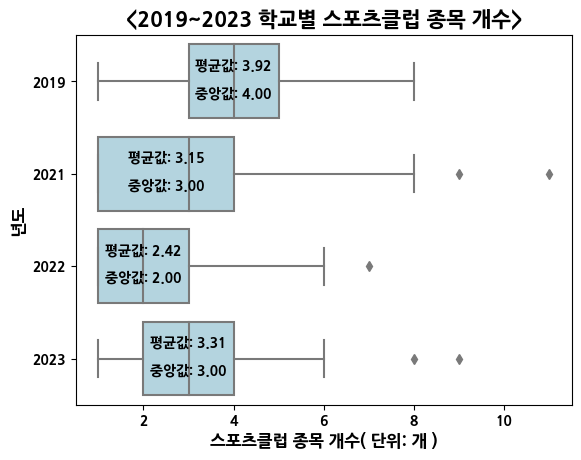

In [35]:
sns.boxplot(data=school_all_df, x="스포츠클럽 종목", y="년도", color="lightblue", orient="h")

plt.title("<2019~2023 학교별 스포츠클럽 종목 개수>", fontweight="bold", fontsize=15)
plt.xlabel("스포츠클럽 종목 개수( 단위: 개 )", fontweight="bold", fontsize=12)
plt.ylabel("년도", fontweight="bold", fontsize=12)

# 평균 계산 및 표시
mean_value = school_all_df[school_all_df["년도"] == 2019]['스포츠클럽 종목'].mean()
median_value = school_all_df[school_all_df["년도"] == 2019]['스포츠클럽 종목'].median()
plt.text(4, -0.1, f'평균값: {mean_value:.2f}', ha='center', va='bottom', fontweight="bold", fontsize=10)
plt.text(4, 0.2, f'중앙값: {median_value:.2f}', ha='center', va='bottom', fontweight="bold", fontsize=10)

mean_value = school_all_df[school_all_df["년도"] == 2021]['스포츠클럽 종목'].mean()
median_value = school_all_df[school_all_df["년도"] == 2021]['스포츠클럽 종목'].median()
plt.text(2.5, 0.9, f'평균값: {mean_value:.2f}', ha='center', va='bottom', fontweight="bold", fontsize=10)
plt.text(2.5, 1.2, f'중앙값: {median_value:.2f}', ha='center', va='bottom', fontweight="bold", fontsize=10)

mean_value = school_all_df[school_all_df["년도"] == 2022]['스포츠클럽 종목'].mean()
median_value = school_all_df[school_all_df["년도"] == 2022]['스포츠클럽 종목'].median()
plt.text(2, 1.9, f'평균값: {mean_value:.2f}', ha='center', va='bottom', fontweight="bold", fontsize=10)
plt.text(2, 2.2, f'중앙값: {median_value:.2f}', ha='center', va='bottom', fontweight="bold", fontsize=10)

mean_value = school_all_df[school_all_df["년도"] == 2023]['스포츠클럽 종목'].mean()
median_value = school_all_df[school_all_df["년도"] == 2023]['스포츠클럽 종목'].median()
plt.text(3, 2.9, f'평균값: {mean_value:.2f}', ha='center', va='bottom', fontweight="bold", fontsize=10)
plt.text(3, 3.2, f'중앙값: {median_value:.2f}', ha='center', va='bottom', fontweight="bold", fontsize=10)

plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

# 종류별 체육시설보유 수 barplot

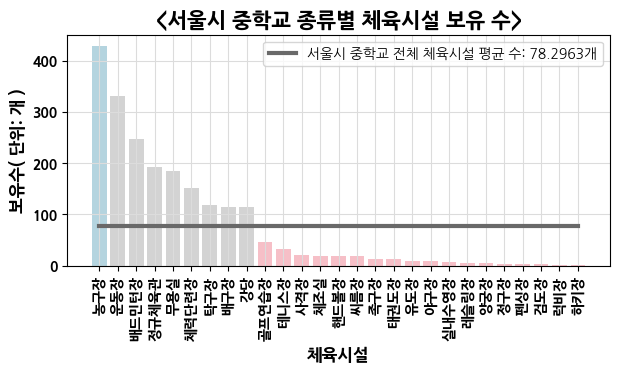

In [36]:
facility = school_df.groupby(["체육시설"])[["보유수"]].sum().reset_index().sort_values(by="보유수", ascending=False).reset_index(drop=True)

palette = ["lightblue" if value == facility["보유수"].max() else "lightpink" if value < facility["보유수"].mean() else "lightgray" for value in facility["보유수"]]

sports_importance = list(facility[facility["보유수"] < facility["보유수"].mean()]["체육시설"].reset_index(drop=True))

plt.figure(figsize=(7, 3))

sns.barplot(data=facility, x="체육시설", y="보유수", palette=palette)

mean_data = [facility["보유수"].mean() for _ in range(len(facility))]
plt.plot(mean_data, label="서울시 중학교 전체 체육시설 평균 수: %.4f개"%mean_data[0], linewidth=3, color="dimgray")

plt.title("<서울시 중학교 종류별 체육시설 보유 수>", fontweight="bold", fontsize=15)
plt.xlabel("체육시설", fontweight="bold", fontsize=12)
plt.ylabel("보유수( 단위: 개 )", fontweight="bold", fontsize=12)

plt.xticks(rotation=90, fontweight="bold")
plt.yticks(fontweight="bold")
plt.grid(color="gainsboro")
plt.legend(loc="best")

# 종목별 스포츠클럽 수 barplot

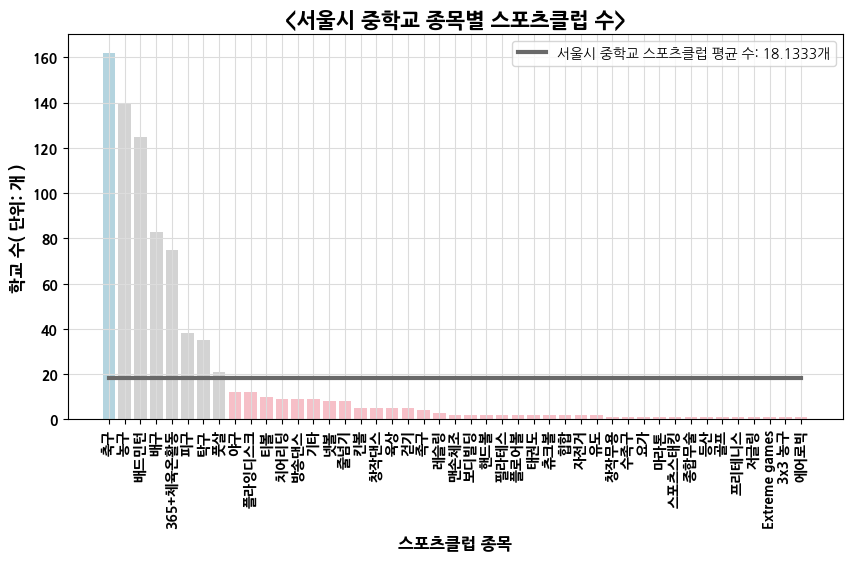

In [37]:
school_club_df = data1.groupby(["종목"])[["학교"]].count().sort_values(by="학교", ascending=False).reset_index()

school_club_df = school_club_df.replace({"기타(其他)": "기타",
                                        "수(手)족구": "수족구"}).rename(columns={"학교": "학교 수"})

palette = ["lightblue" if value == school_club_df["학교 수"].max() else "lightpink"
           if value < school_club_df["학교 수"].mean() else "lightgray" for value in school_club_df["학교 수"]]

plt.figure(figsize=(10, 5))
sns.barplot(data=school_club_df, x="종목", y="학교 수", palette=palette)

mean_data = [school_club_df["학교 수"].mean() for _ in range(len(school_club_df))]
plt.plot(mean_data, label="서울시 중학교 스포츠클럽 평균 수: %.4f개"%mean_data[0], linewidth=3, color="dimgray")

plt.title("<서울시 중학교 종목별 스포츠클럽 수>", fontweight="bold", fontsize=15)
plt.xlabel("스포츠클럽 종목", fontweight="bold", fontsize=12)
plt.ylabel("학교 수( 단위: 개 )", fontweight="bold", fontsize=12)

plt.xticks(rotation=90, fontweight="bold")
plt.yticks(fontweight="bold")
plt.grid(color="gainsboro")
plt.legend(loc="best")

# 시각화

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [39]:
school_tmp1 = school_df.groupby(["자치구", "학교"])[["체육시설"]].count().reset_index()[["자치구", "학교"]]
school_tmp2 = school_df2.groupby(["자치구", "학교"])[["스포츠클럽 종목"]].count().reset_index()[["자치구", "학교"]]

school_tmp = school_tmp1.merge(school_tmp2, on=["자치구", "학교"], how="inner")

school_final_df = school_df.merge(school_tmp, on=["자치구", "학교"], how="inner")
school_final_df2 = school_df2.merge(school_tmp, on=["자치구", "학교"], how="inner")

In [40]:
def location(gu):
    school_gu_df = school_final_df[school_final_df["자치구"] == gu].reset_index(drop=True)

    location_df = school_gu_df.groupby(["학교"]).agg({"위도": "unique",
                           "경도": "unique"}).reset_index()

    for idx, row in location_df.iterrows():
        location_df.at[idx, "위도"] = row["위도"][0]
        location_df.at[idx, "경도"] = row["경도"][0]
    
    return location_df

In [41]:
def calc_mse(location_df, school_cluster_df):

    for idx, row in location_df.iterrows():
        cnt = 0
    
        while row["학교"] not in school_cluster_df.at[cnt, "학교"]:
            cnt += 1
        
        location_df.at[idx, "중심점(위도)"] = school_cluster_df.at[cnt, "중심점(위도)"]
        location_df.at[idx, "중심점(경도)"] = school_cluster_df.at[cnt, "중심점(경도)"]
        location_df.at[idx, "cluster_num"] = cnt
    
    location_df["cluster_num"] = location_df["cluster_num"].astype(int)
    
    location_df["중심점과의 차(위도)"] = location_df["중심점(위도)"] - location_df["위도"]
    location_df["중심점과의 차(경도)"] = location_df["중심점(경도)"] - location_df["경도"]

    location_df["중심점과의 차 제곱(위도)"] = location_df["중심점과의 차(위도)"] * location_df["중심점과의 차(위도)"]
    location_df["중심점과의 차 제곱(경도)"] = location_df["중심점과의 차(경도)"] * location_df["중심점과의 차(경도)"]
    
    for idx, row in location_df.iterrows():
        location_df.at[idx, "유클리드 거리"] = math.sqrt(row["중심점과의 차 제곱(위도)"] + row["중심점과의 차 제곱(경도)"])
    
    centroid_df = location_df.groupby(["cluster_num"]).agg({"중심점(위도)":"unique",
                                                            "중심점(경도)":"unique"}).reset_index(drop=True)
    for idx, row in centroid_df.iterrows():
        centroid_df.at[idx, "중심점(위도)"] = row["중심점(위도)"][0]
        centroid_df.at[idx, "중심점(경도)"] = row["중심점(경도)"][0]

    tmp = location_df[["cluster_num", "학교", "유클리드 거리"]]
    tmp = tmp.sort_values(by=["cluster_num", "유클리드 거리"], ascending=True).reset_index(drop=True)

    mse_school_lst = []
    tmp_lst = []
    num = 0
    for idx, row in tmp.iterrows():
        if row["cluster_num"] != num:
            num += 1
            mse_school_lst.append(tmp_lst)
            tmp_lst = []
    
        tmp_lst.append(row["학교"])
    
    mse_school_lst.append(tmp_lst)
    print(mse_school_lst)
    
    for idx in school_cluster_df.index:
        try:
            school_cluster_df.at[idx, "학교"] = ', '.join(mse_school_lst[idx])
        except IndexError:
            pass
    
    return school_cluster_df, centroid_df

In [42]:
from scipy.spatial import ConvexHull

In [119]:
def k_means_cluster(location_df, k, gu, graph=False, centroid=False):
    
    school_cluster_df = location_df[["학교"]]
    x = np.array(location_df[["위도", "경도"]])

    k = k
    kmeans = KMeans(n_clusters=k, random_state=42)

    labels = kmeans.fit_predict(x)
    centroids = kmeans.cluster_centers_
    
    school_cluster_df["cluster_num"] = labels
    
    school_cluster_df = school_cluster_df.sort_values(by="cluster_num", ascending=True)
    school_cluster_df = school_cluster_df.groupby(["cluster_num"]).agg({"학교": "unique"})
    
    for idx, row in school_cluster_df.iterrows():
        school_cluster_df.at[idx, "학교"] = ', '.join(row["학교"])
        
    for idx, row in school_cluster_df.iterrows():
        school_cluster_df.at[idx, "중심점(위도)"] = centroids[idx][0]
        school_cluster_df.at[idx, "중심점(경도)"] = centroids[idx][1]
    
    if graph:
        colors = plt.cm.Spectral(np.linspace(0, 1, k))
        
        for i, col in zip(range(k), colors):
            cluster_points = location_df.loc[labels == i, ['경도', '위도']]
            plt.scatter(cluster_points['경도'], cluster_points['위도'], s=50, c=[col], label=f'클러스터 {i+1}')
            
            for point in cluster_points.values:
                plt.plot([centroids[i, 1], point[0]], [centroids[i, 0], point[1]], linestyle='-', linewidth=0.5, color=col)

        plt.scatter(centroids[:, 1], centroids[:, 0], marker='x', s=50, linewidth=3, c='k', label='중심점')

        for idx, row in location_df.iterrows():
            if (row["학교"] == "동신중학교") or (row["학교"] == "강일중학교"):
                plt.text(row["경도"] - 0.003, row["위도"], row["학교"])
            else:
                plt.text(row['경도'] - 0.003, row['위도'] - 0.002, row['학교'])
                
         # 클러스터 중심점을 연결하여 다각형 그리기
        hull = ConvexHull(centroids)
        for simplex in hull.simplices:
            plt.plot(centroids[simplex, 1], centroids[simplex, 0], 'k-', linewidth=3)
    
        # 다각형의 무게중심 계산 및 표시
        x_lst = centroids[:, 1]
        y_lst = centroids[:, 0]
        plt.scatter(np.mean(x_lst), np.mean(y_lst), marker='x', s=100, color="red", linewidth=3, label='다각형 무게중심')
            

        # 그래프 설정
        plt.title(f'<{gu} 학교 간 스포츠클럽 클러스터 모델>', fontweight="bold", fontsize=15)
        plt.xlabel('경도', fontweight="bold", fontsize=12)
        plt.ylabel('위도', fontweight="bold", fontsize=12)
        plt.xticks(fontweight="bold")
        plt.yticks(fontweight="bold")
        plt.legend(loc="best")
        plt.grid(color="gainsboro")
        plt.show()
    
    school_cluster_df, centroid_df = calc_mse(location_df, school_cluster_df)
    
    silhouette_avg = silhouette_score(x, labels)
    
    if centroid:
        return centroid_df
    else:
        return school_cluster_df
#         return silhouette_avg

In [57]:
from sklearn.metrics import pairwise_distances_argmin_min

In [80]:
def k_medians_cluster(location_df, k, gu, graph=False, centroid=False):
    school_cluster_df = location_df[["학교"]]
    
    x = location_df[["위도", "경도"]].to_numpy(dtype=np.float64)
    
    initial_indices = np.random.choice(len(x), k, replace=False)
    centroids = x[initial_indices]

    max_iter = 300  # 최대 반복 횟수 설정
    for _ in range(max_iter):
        try:
            labels, _ = pairwise_distances_argmin_min(x, centroids, metric='euclidean', axis=1)
        except ValueError:
            x = np.nan_to_num(x)
            labels, _ = pairwise_distances_argmin_min(x, centroids, metric='euclidean', axis=1)

        new_centroids = np.array([np.median(x[labels == i], axis=0) for i in range(k)])
        
        if np.allclose(centroids, new_centroids, atol=1e-4):
            break

        centroids = new_centroids
        
    school_cluster_df["cluster_num"] = labels
    
    school_cluster_df = school_cluster_df.sort_values(by="cluster_num", ascending=True)
    school_cluster_df = school_cluster_df.groupby(["cluster_num"]).agg({"학교": "unique"})
    
    for idx, row in school_cluster_df.iterrows():
        school_cluster_df.at[idx, "학교"] = ', '.join(row["학교"])
        
    for idx, row in school_cluster_df.iterrows():
        school_cluster_df.at[idx, "중심점(위도)"] = centroids[idx][0]
        school_cluster_df.at[idx, "중심점(경도)"] = centroids[idx][1]
        
    if graph:
        colors = plt.cm.Spectral(np.linspace(0, 1, k))
    
        for i, col in zip(range(k), colors):
            cluster_points = location_df.loc[labels == i, ['경도', '위도']]
            plt.scatter(cluster_points['경도'], cluster_points['위도'], s=50, c=[col], label=f'클러스터 {i+1}')

        plt.scatter(centroids[:, 1], centroids[:, 0], marker='x', s=50, linewidth=3, c='k', label='중심점')

        for idx, row in location_df.iterrows():
            plt.text(row['경도']-0.003, row['위도']-0.002, row['학교'])

        plt.title(f'<{gu} 학교스포츠클럽 클러스터 조성 모델: k={k}>', fontweight="bold", fontsize=15)
        plt.xlabel('경도', fontweight="bold", fontsize=12)
        plt.ylabel('위도', fontweight="bold", fontsize=12)
    
        plt.xticks(fontweight="bold")
        plt.yticks(fontweight="bold")

        plt.legend(loc="best")
        plt.grid(color="gainsboro")
        
        plt.show()
        
    school_cluster_df, centroid_df = calc_mse(location_df, school_cluster_df)
    
    silhouette_avg = silhouette_score(x, labels)
    
    if centroid:
        return centroid_df
    else:
        return school_cluster_df
#         return silhouette_avg

In [59]:
def graph(gu, tf=False, centroid=False):
    location_df = location(gu)
    algorithm = list(optimum[optimum["자치구"] == gu]["기법"].values)[0]
    k = list(optimum[optimum["자치구"] == gu]["k"].values)[0]
                      
    if algorithm == "k_means":
        result_school = k_means_cluster(location_df, k=k, gu=gu, graph=tf, centroid=centroid)
    elif algorithm == "k_medians":
        result_school = k_medians_cluster(location_df, k=k, gu=gu, graph=tf, centroid=centroid)
        
    return result_school

In [60]:
def silhouette(mean="k_means_cluster"):
    silhouette_table = pd.DataFrame(columns=list(school_df["자치구"].unique()), index=["k=3", "k=5", "k=7", "k=9"])
    
    for gu in list(school_df["자치구"].unique()):
        location_df = location(gu)
        
        for k in range(3, 10, 2):
            try:
                if mean == "k_means_cluster":
                    silhouette = k_means_cluster(location_df, k=k, gu=gu)
                else:
                    silhouette = k_medians_cluster(location_df, k=k, gu=gu)
                    
                silhouette_table.at[f"k={k}", gu] = "%.4f"%silhouette
            except ValueError:
                break
    
    return silhouette_table

In [61]:
silhouette_table_mean = silhouette()

silhouette_table_mean

C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-pack

[['오금중학교', '송파중학교', '세륜중학교', '오주중학교', '보인중학교', '가락중학교', '가원중학교', '일신여자중학교', '오륜중학교'], ['송례중학교', '거원중학교', '문정중학교', '문현중학교', '위례솔중학교'], ['잠실중학교', '방이중학교', '잠신중학교', '영파여자중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['가원중학교', '송파중학교', '문정중학교', '가락중학교', '문현중학교', '일신여자중학교'], ['방이중학교', '영파여자중학교'], ['세륜중학교', '오주중학교', '오금중학교', '보인중학교', '오륜중학교'], ['잠실중학교', '잠신중학교'], ['거원중학교', '위례솔중학교', '송례중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['오륜중학교', '세륜중학교'], ['오주중학교', '보인중학교', '송파중학교', '오금중학교'], ['잠실중학교', '잠신중학교'], ['영파여자중학교'], ['거원중학교', '위례솔중학교', '송례중학교'], ['일신여자중학교', '가락중학교', '방이중학교'], ['문정중학교', '가원중학교', '문현중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['잠실중학교', '잠신중학교'], ['오주중학교', '보인중학교', '송파중학교'], ['문정중학교', '가원중학교', '문현중학교'], ['영파여자중학교'], ['송례중학교'], ['가락중학교', '일신여자중학교'], ['거원중학교', '위례솔중학교'], ['세륜중학교', '오금중학교', '오륜중학교'], ['방이중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['가산중학교', '한울중학교'], ['난곡중학교'], ['문일중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['동명여자중학교', '중앙여자중학교'], ['신연중학교', '연북중학교', '홍은중학교', '명지중학교'], ['연희중학교', '가재울중학교', '서연중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['서연중학교'], ['신연중학교', '연북중학교'], ['연희중학교', '가재울중학교'], ['동명여자중학교', '중앙여자중학교'], ['홍은중학교', '명지중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[['서연중학교'], ['신연중학교', '연북중학교'], ['가재울중학교'], ['중앙여자중학교'], ['홍은중학교'], ['동명여자중학교'], ['연희중학교', '명지중학교']]


C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-pack

[['서연중학교'], ['연북중학교'], ['중앙여자중학교'], ['연희중학교'], ['동명여자중학교'], ['홍은중학교'], ['가재울중학교'], ['명지중학교'], ['신연중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['성남중학교', '숭의여자중학교', '영등포중학교', '장승중학교', '대방중학교'], ['사당중학교', '상도중학교', '상현중학교', '남성중학교'], ['중앙대학교사범대학부속중학교', '동양중학교', '국사봉중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['사당중학교', '상도중학교', '상현중학교', '남성중학교'], ['장승중학교', '국사봉중학교'], ['대방중학교'], ['동양중학교', '중앙대학교사범대학부속중학교'], ['숭의여자중학교', '성남중학교', '영등포중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['사당중학교', '남성중학교'], ['장승중학교'], ['대방중학교'], ['동양중학교', '중앙대학교사범대학부속중학교'], ['숭의여자중학교', '성남중학교', '영등포중학교'], ['국사봉중학교'], ['상도중학교', '상현중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['사당중학교'], ['장승중학교'], ['대방중학교'], ['중앙대학교사범대학부속중학교'], ['남성중학교'], ['숭의여자중학교', '성남중학교', '영등포중학교'], ['상도중학교', '상현중학교'], ['국사봉중학교'], ['동양중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['동신중학교', '성내중학교', '한산중학교', '천일중학교'], ['성덕여자중학교', '배재중학교', '강일중학교', '신명중학교', '신암중학교', '한영중학교'], ['강명중학교', '강동중학교', '고덕중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['신암중학교', '강일중학교', '성덕여자중학교', '천일중학교'], ['고덕중학교', '배재중학교'], ['동신중학교', '성내중학교', '한산중학교'], ['강동중학교', '강명중학교'], ['신명중학교', '한영중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['강일중학교', '신암중학교', '성덕여자중학교'], ['강명중학교'], ['동신중학교', '성내중학교', '한산중학교'], ['신명중학교'], ['한영중학교', '배재중학교', '고덕중학교'], ['강동중학교'], ['천일중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['강명중학교'], ['천일중학교'], ['신명중학교'], ['성내중학교', '동신중학교'], ['고덕중학교'], ['강일중학교', '신암중학교', '성덕여자중학교'], ['강동중학교'], ['한산중학교'], ['배재중학교', '한영중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[['인수중학교', '서라벌중학교'], ['수송중학교', '번동중학교'], ['삼각산중학교', '화계중학교']]


C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-pack

[['서라벌중학교'], ['수송중학교', '번동중학교'], ['삼각산중학교'], ['화계중학교'], ['인수중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['강신중학교', '금옥중학교', '양천중학교', '양강중학교'], ['영도중학교', '목운중학교', '목동중학교', '양동중학교'], ['신원중학교', '양서중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['양강중학교'], ['신원중학교', '양서중학교'], ['양동중학교', '영도중학교'], ['강신중학교', '금옥중학교', '양천중학교'], ['목동중학교', '목운중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['목동중학교', '목운중학교'], ['신원중학교', '양서중학교'], ['강신중학교', '금옥중학교'], ['양동중학교'], ['양천중학교'], ['영도중학교'], ['양강중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['목운중학교'], ['양천중학교'], ['금옥중학교'], ['신원중학교', '양서중학교'], ['양강중학교'], ['양동중학교'], ['강신중학교'], ['영도중학교'], ['목동중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['영림중학교', '영서중학교', '신도림중학교', '구일중학교'], ['항동중학교', '우신중학교', '천왕중학교'], ['오류중학교', '개봉중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['영서중학교', '영림중학교'], ['오류중학교', '개봉중학교'], ['항동중학교', '우신중학교', '천왕중학교'], ['구일중학교'], ['신도림중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['영서중학교', '영림중학교'], ['천왕중학교'], ['오류중학교', '개봉중학교'], ['항동중학교'], ['구일중학교'], ['신도림중학교'], ['우신중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['영림중학교'], ['천왕중학교'], ['개봉중학교'], ['우신중학교'], ['구일중학교'], ['항동중학교'], ['신도림중학교'], ['영서중학교'], ['오류중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['개운중학교', '성신여자중학교', '고명중학교', '종암중학교', '숭곡중학교', '서울대학교사범대학부설중학교', '길음중학교'], ['월곡중학교', '남대문중학교', '장위중학교', '석관중학교'], ['홍익대학교사범대학부속중학교', '삼선중학교', '북악중학교', '고려대학교사범대학부속중학교', '한성여자중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['고려대학교사범대학부속중학교', '북악중학교', '길음중학교'], ['남대문중학교', '석관중학교'], ['장위중학교', '월곡중학교', '숭곡중학교'], ['삼선중학교', '홍익대학교사범대학부속중학교', '한성여자중학교'], ['개운중학교', '성신여자중학교', '종암중학교', '고명중학교', '서울대학교사범대학부설중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['길음중학교', '숭곡중학교'], ['삼선중학교', '홍익대학교사범대학부속중학교', '한성여자중학교'], ['월곡중학교', '장위중학교'], ['고려대학교사범대학부속중학교', '북악중학교'], ['서울대학교사범대학부설중학교', '종암중학교'], ['성신여자중학교', '개운중학교', '고명중학교'], ['남대문중학교', '석관중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['고려대학교사범대학부속중학교', '북악중학교'], ['월곡중학교', '장위중학교'], ['성신여자중학교', '개운중학교', '고명중학교'], ['삼선중학교', '홍익대학교사범대학부속중학교', '한성여자중학교'], ['길음중학교'], ['석관중학교'], ['서울대학교사범대학부설중학교', '종암중학교'], ['숭곡중학교'], ['남대문중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels


[['대청중학교', '휘문중학교', '대명중학교', '숙명여자중학교', '진선여자중학교', '구룡중학교', '도곡중학교', '개원중학교', '봉은중학교'], ['언북중학교', '신구중학교', '청담중학교', '언주중학교', '신사중학교'], ['세곡중학교', '대왕중학교']]


C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-pack

[['대명중학교', '휘문중학교', '봉은중학교', '진선여자중학교'], ['신구중학교', '언북중학교', '신사중학교'], ['세곡중학교', '대왕중학교'], ['대청중학교', '구룡중학교', '숙명여자중학교', '도곡중학교', '개원중학교'], ['언주중학교', '청담중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['도곡중학교', '숙명여자중학교', '진선여자중학교'], ['언주중학교', '청담중학교'], ['세곡중학교', '대왕중학교'], ['대명중학교', '휘문중학교', '봉은중학교'], ['개원중학교'], ['신구중학교', '언북중학교', '신사중학교'], ['구룡중학교', '대청중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['청담중학교'], ['개원중학교'], ['숙명여자중학교', '구룡중학교', '대청중학교', '도곡중학교'], ['세곡중학교', '대왕중학교'], ['신구중학교', '언북중학교'], ['봉은중학교'], ['대명중학교', '휘문중학교'], ['언주중학교', '진선여자중학교'], ['신사중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['양진중학교', '광장중학교', '광남중학교'], ['건국대학교사범대학부속중학교', '구의중학교', '동국대학교사범대학부속여자중학교', '광진중학교', '신양중학교'], ['용곡중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['광진중학교'], ['양진중학교', '광장중학교', '광남중학교'], ['건국대학교사범대학부속중학교', '구의중학교', '동국대학교사범대학부속여자중학교'], ['용곡중학교'], ['신양중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['광진중학교'], ['광장중학교', '양진중학교'], ['건국대학교사범대학부속중학교', '구의중학교'], ['용곡중학교'], ['신양중학교'], ['광남중학교'], ['동국대학교사범대학부속여자중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['광진중학교'], ['양진중학교'], ['구의중학교'], ['용곡중학교'], ['신양중학교'], ['동국대학교사범대학부속여자중학교'], ['광남중학교'], ['광장중학교'], ['건국대학교사범대학부속중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['마곡하늬중학교', '송정중학교', '수명중학교'], ['등촌중학교', '백석중학교', '등원중학교', '염경중학교', '등명중학교'], ['방원중학교', '방화중학교', '마곡중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['등촌중학교', '백석중학교', '염경중학교'], ['방화중학교', '방원중학교'], ['등명중학교', '등원중학교'], ['마곡하늬중학교', '송정중학교', '수명중학교'], ['마곡중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['마곡하늬중학교', '송정중학교', '수명중학교'], ['백석중학교', '등촌중학교'], ['등명중학교', '등원중학교'], ['방화중학교'], ['염경중학교'], ['마곡중학교'], ['방원중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['마곡하늬중학교', '송정중학교'], ['백석중학교', '등촌중학교'], ['방원중학교'], ['등명중학교'], ['방화중학교'], ['마곡중학교'], ['수명중학교'], ['염경중학교'], ['등원중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['상암중학교', '중암중학교'], ['광성중학교', '신수중학교', '서울여자중학교'], ['홍익대학교사범대학부속여자중학교', '경성중학교', '성서중학교', '성사중학교', '성산중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[['홍익대학교사범대학부속여자중학교', '성사중학교', '성서중학교', '경성중학교'], ['상암중학교'], ['광성중학교', '신수중학교', '서울여자중학교'], ['중암중학교'], ['성산중학교']]


C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-pack

[['경성중학교', '성사중학교'], ['신수중학교', '광성중학교'], ['상암중학교'], ['성산중학교'], ['서울여자중학교'], ['홍익대학교사범대학부속여자중학교', '성서중학교'], ['중암중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['서울여자중학교'], ['성서중학교'], ['상암중학교'], ['신수중학교', '광성중학교'], ['성산중학교'], ['경성중학교'], ['중암중학교'], ['성사중학교'], ['홍익대학교사범대학부속여자중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[['행당중학교', '성수중학교'], ['마장중학교', '한양대학교사범대학부속중학교'], ['무학중학교']]


C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-pack

[['무학중학교'], ['한양대학교사범대학부속중학교'], ['마장중학교'], ['행당중학교'], ['성수중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['동성중학교'], ['배화여자중학교', '청운중학교'], ['중앙중학교', '덕성여자중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['동성중학교'], ['청운중학교'], ['덕성여자중학교'], ['중앙중학교'], ['배화여자중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['원촌중학교', '경원중학교', '신동중학교', '서일중학교', '서운중학교', '신반포중학교'], ['이수중학교', '동덕여자중학교', '방배중학교', '서문여자중학교', '서초중학교'], ['언남중학교', '영동중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['경원중학교', '신동중학교', '원촌중학교'], ['이수중학교', '동덕여자중학교', '서문여자중학교'], ['언남중학교', '영동중학교'], ['방배중학교', '신반포중학교'], ['서운중학교', '서일중학교', '서초중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[['서일중학교', '서운중학교'], ['이수중학교', '동덕여자중학교', '서문여자중학교'], ['경원중학교', '신동중학교', '원촌중학교'], ['언남중학교'], ['방배중학교', '신반포중학교'], ['서초중학교'], ['영동중학교']]


C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-pack

[['서일중학교', '서운중학교'], ['동덕여자중학교', '이수중학교'], ['경원중학교', '신동중학교', '원촌중학교'], ['영동중학교'], ['방배중학교'], ['언남중학교'], ['서초중학교'], ['신반포중학교'], ['서문여자중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['휘경중학교', '휘경여자중학교', '전농중학교', '전일중학교', '전동중학교'], ['숭인중학교', '동대문중학교', '성일중학교'], ['장평중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['장평중학교'], ['전농중학교', '전일중학교', '휘경중학교'], ['성일중학교'], ['전동중학교', '휘경여자중학교'], ['동대문중학교', '숭인중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['장평중학교'], ['전농중학교', '전일중학교'], ['성일중학교'], ['전동중학교', '휘경여자중학교'], ['동대문중학교'], ['숭인중학교'], ['휘경중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[['장평중학교'], ['전농중학교'], ['숭인중학교'], ['휘경여자중학교'], ['성일중학교'], ['동대문중학교'], ['휘경중학교'], ['전동중학교'], ['전일중학교']]


C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-pack

[['상원중학교', '노일중학교', '상경중학교', '청원중학교', '수락중학교'], ['불암중학교', '하계중학교', '중원중학교', '상계중학교', '중계중학교', '신상중학교', '노원중학교', '상계제일중학교', '공릉중학교', '태랑중학교'], ['월계중학교', '염광중학교', '녹천중학교', '신창중학교', '중평중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[['중계중학교', '상계제일중학교', '상계중학교'], ['월계중학교', '염광중학교', '신창중학교', '녹천중학교'], ['상원중학교', '노일중학교', '상경중학교', '청원중학교', '수락중학교'], ['태랑중학교', '공릉중학교'], ['중원중학교', '하계중학교', '불암중학교', '신상중학교', '노원중학교', '중평중학교']]


C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-pack

[['하계중학교', '중원중학교', '불암중학교'], ['상원중학교', '노일중학교', '상경중학교', '청원중학교', '수락중학교'], ['염광중학교', '월계중학교', '신창중학교'], ['태랑중학교', '공릉중학교'], ['상계제일중학교', '중계중학교'], ['신상중학교', '노원중학교', '상계중학교'], ['중평중학교', '녹천중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['노일중학교', '상경중학교'], ['하계중학교', '중원중학교', '불암중학교'], ['염광중학교', '월계중학교', '신창중학교'], ['태랑중학교', '공릉중학교'], ['신상중학교', '노원중학교', '상계중학교'], ['상계제일중학교', '중계중학교'], ['중평중학교', '녹천중학교'], ['상원중학교', '청원중학교'], ['수락중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['봉림중학교', '신관중학교', '신림중학교', '삼성중학교', '당곡중학교'], ['봉원중학교', '관악중학교', '구암중학교'], ['성보중학교', '남강중학교', '남서울중학교', '미성중학교', '난우중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['구암중학교', '당곡중학교'], ['봉원중학교', '관악중학교'], ['성보중학교', '남강중학교', '남서울중학교', '미성중학교', '난우중학교'], ['삼성중학교', '신림중학교'], ['신관중학교', '봉림중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[['성보중학교', '남서울중학교', '미성중학교'], ['봉원중학교', '관악중학교'], ['남강중학교', '난우중학교'], ['삼성중학교', '신림중학교'], ['신관중학교', '봉림중학교'], ['구암중학교'], ['당곡중학교']]


C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[['성보중학교', '남서울중학교'], ['봉원중학교'], ['삼성중학교', '신림중학교'], ['신관중학교', '봉림중학교'], ['남강중학교', '난우중학교'], ['구암중학교'], ['당곡중학교'], ['미성중학교'], ['관악중학교']]


C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-pack

[['은평중학교', '선정중학교', '구산중학교', '예일여자중학교', '대성중학교'], ['상신중학교', '증산중학교', '충암중학교'], ['연천중학교', '연신중학교', '불광중학교', '진관중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['은평중학교', '선정중학교', '구산중학교', '예일여자중학교', '대성중학교'], ['상신중학교', '증산중학교'], ['연신중학교', '연천중학교', '불광중학교'], ['진관중학교'], ['충암중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['상신중학교', '증산중학교'], ['대성중학교', '선정중학교'], ['연신중학교', '연천중학교', '불광중학교'], ['구산중학교', '은평중학교'], ['진관중학교'], ['충암중학교'], ['예일여자중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['대성중학교', '선정중학교'], ['상신중학교'], ['불광중학교'], ['진관중학교'], ['예일여자중학교'], ['충암중학교'], ['구산중학교', '은평중학교'], ['연신중학교', '연천중학교'], ['증산중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['신방학중학교', '방학중학교', '효문중학교'], ['창북중학교', '신도봉중학교', '백운중학교', '창일중학교', '도봉중학교'], ['창동중학교', '북서울중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['북서울중학교'], ['창북중학교', '신도봉중학교', '백운중학교', '창일중학교', '도봉중학교'], ['방학중학교', '신방학중학교'], ['효문중학교'], ['창동중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['창동중학교'], ['창북중학교', '신도봉중학교', '백운중학교', '도봉중학교'], ['북서울중학교'], ['효문중학교'], ['방학중학교', '신방학중학교'], ['창일중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['북서울중학교'], ['백운중학교'], ['효문중학교'], ['창동중학교'], ['방학중학교', '신방학중학교'], ['창북중학교'], ['도봉중학교'], ['창일중학교'], ['신도봉중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['대림중학교', '신길중학교', '영남중학교'], ['당산서중학교', '선유중학교', '양화중학교', '당산중학교', '문래중학교'], ['영원중학교', '여의도중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['양화중학교', '문래중학교'], ['영원중학교', '신길중학교'], ['당산서중학교', '선유중학교', '당산중학교'], ['영남중학교', '대림중학교'], ['여의도중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['양화중학교', '문래중학교'], ['영원중학교'], ['당산서중학교', '선유중학교', '당산중학교'], ['영남중학교'], ['여의도중학교'], ['대림중학교'], ['신길중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['문래중학교'], ['영원중학교'], ['영남중학교'], ['선유중학교', '당산서중학교'], ['대림중학교'], ['여의도중학교'], ['신길중학교'], ['양화중학교'], ['당산중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['덕수중학교'], ['창덕여자중학교'], ['한양중학교', '대경중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['중랑중학교', '태릉중학교', '장안중학교', '상봉중학교', '원묵중학교'], ['면목중학교', '중화중학교', '용마중학교'], ['봉화중학교', '영란여자중학교', '송곡여자중학교', '혜원여자중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['장안중학교', '중랑중학교', '상봉중학교'], ['영란여자중학교', '송곡여자중학교', '봉화중학교'], ['용마중학교'], ['원묵중학교', '태릉중학교'], ['중화중학교', '면목중학교', '혜원여자중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['송곡여자중학교', '영란여자중학교'], ['상봉중학교'], ['중화중학교', '면목중학교'], ['원묵중학교', '태릉중학교'], ['장안중학교', '중랑중학교'], ['봉화중학교', '혜원여자중학교'], ['용마중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['송곡여자중학교', '영란여자중학교'], ['장안중학교', '중랑중학교'], ['중화중학교', '면목중학교'], ['원묵중학교'], ['상봉중학교'], ['용마중학교'], ['봉화중학교'], ['혜원여자중학교'], ['태릉중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['한강중학교', '오산중학교'], ['신광여자중학교', '선린중학교', '용산중학교'], ['용강중학교']]
[['오산중학교'], ['신광여자중학교', '선린중학교'], ['용강중학교'], ['용산중학교'], ['한강중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\577891486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels


,송파구,금천구,서대문구,동작구,강동구,강북구,양천구,구로구,성북구,강남구,...,서초구,동대문구,노원구,관악구,은평구,도봉구,영등포구,중구,중랑구,용산구
k=3,0.3288,0.0756,0.4328,0.4037,0.3781,0.4861,0.5114,0.5283,0.3813,0.4775,...,0.4403,0.4404,0.4433,0.4165,0.5520,0.3879,0.4188,0.1899,0.4896,0.4907
k=5,0.3561,NaN,0.3527,0.4519,0.3380,0.2618,0.4120,0.3661,0.3881,0.3682,...,0.4110,0.3592,0.4535,0.4792,0.5110,0.3845,0.3337,NaN,0.4661,0.2429
k=7,0.3470,NaN,0.1325,0.3589,0.1759,NaN,0.2943,0.2419,0.4271,0.3472,...,0.3730,0.2689,0.5611,0.4986,0.5033,0.2753,0.1931,NaN,0.4557,NaN
k=9,0.3351,NaN,NaN,0.2217,0.1207,NaN,0.1156,NaN,0.3763,0.3387,...,0.3045,NaN,0.4743,0.4358,0.3110,0.1463,0.1171,NaN,0.3259,NaN


In [62]:
silhouette_table_mean = silhouette_table_mean.fillna(0)

In [63]:
silhouette_table_median = silhouette("k_medians_cluster")

silhouette_table_median

C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

[['방이중학교', '일신여자중학교', '가락중학교', '잠실중학교', '영파여자중학교', '잠신중학교'], ['문정중학교', '가원중학교', '송파중학교', '문현중학교', '송례중학교'], ['오주중학교', '보인중학교', '세륜중학교', '오금중학교', '오륜중학교', '거원중학교', '위례솔중학교']]
[['문정중학교', '가원중학교', '송파중학교', '문현중학교'], ['거원중학교', '위례솔중학교', '송례중학교'], ['오금중학교', '오주중학교', '세륜중학교', '보인중학교', '가락중학교'], ['방이중학교', '잠실중학교', '일신여자중학교', '잠신중학교'], ['오륜중학교', '영파여자중학교']]
[['송례중학교', '문현중학교'], ['오주중학교', '보인중학교', '오륜중학교'], ['영파여자중학교'], ['가락중학교', '오금중학교', '세륜중학교', '일신여자중학교'], ['잠실중학교', '잠신중학교', '방이중학교'], ['문정중학교', '송파중학교', '가원중학교'], ['거원중학교', '위례솔중학교']]
[['보인중학교', '오주중학교'], ['세륜중학교', '오금중학교', '오륜중학교'], ['가원중학교', '문정중학교'], ['문현중학교'], ['잠실중학교', '잠신중학교', '영파여자중학교'], ['송파중학교'], ['거원중학교', '위례솔중학교'], ['일신여자중학교', '가락중학교', '방이중학교'], ['송례중학교']]
[['한울중학교', '난곡중학교'], ['가산중학교'], ['문일중학교']]
[['연희중학교', '명지중학교', '서연중학교', '가재울중학교'], ['신연중학교', '연북중학교', '홍은중학교'], ['동명여자중학교', '중앙여자중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

[['동명여자중학교', '중앙여자중학교'], ['신연중학교', '연북중학교'], ['서연중학교'], ['홍은중학교', '명지중학교'], ['연희중학교', '가재울중학교']]
[['신연중학교'], ['홍은중학교'], ['연북중학교'], ['명지중학교'], ['연희중학교', '가재울중학교'], ['서연중학교'], ['동명여자중학교', '중앙여자중학교']]
[['연북중학교'], ['중앙여자중학교'], ['신연중학교'], ['연희중학교'], ['명지중학교'], ['가재울중학교'], ['서연중학교'], ['홍은중학교'], ['동명여자중학교']]
[['동양중학교', '장승중학교', '중앙대학교사범대학부속중학교', '국사봉중학교'], ['성남중학교', '숭의여자중학교', '영등포중학교', '대방중학교'], ['사당중학교', '상도중학교', '상현중학교', '남성중학교']]
[['대방중학교'], ['동양중학교', '중앙대학교사범대학부속중학교'], ['사당중학교', '상도중학교', '상현중학교', '남성중학교'], ['장승중학교', '국사봉중학교'], ['숭의여자중학교', '성남중학교', '영등포중학교']]
[['중앙대학교사범대학부속중학교'], ['영등포중학교', '숭의여자중학교', '성남중학교', '장승중학교'], ['동양중학교'], ['상도중학교', '상현중학교'], ['대방중학교'], ['사당중학교', '남성중학교'], ['국사봉중학교']]
[['상도중학교', '상현중학교'], ['장승중학교'], ['성남중학교', '숭의여자중학교'], ['대방중학교'], ['중앙대학교사범대학부속중학교'], ['동양중학교'], ['영등포중학교'], ['사당중학교', '남성중학교'], ['국사봉중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

[['고덕중학교', '한영중학교', '배재중학교', '강명중학교', '강동중학교'], ['성덕여자중학교', '신명중학교', '한산중학교'], ['천일중학교', '동신중학교', '신암중학교', '강일중학교', '성내중학교']]
[['성내중학교', '동신중학교'], ['강명중학교', '고덕중학교', '한영중학교', '강동중학교'], ['천일중학교'], ['강일중학교', '성덕여자중학교', '신암중학교', '배재중학교'], ['신명중학교', '한산중학교']]
[['신암중학교'], ['신명중학교', '한영중학교'], ['강일중학교', '성덕여자중학교', '배재중학교'], ['강동중학교', '강명중학교'], ['고덕중학교'], ['천일중학교'], ['성내중학교', '한산중학교', '동신중학교']]
[['신암중학교'], ['배재중학교', '한영중학교'], ['강동중학교', '강명중학교'], ['고덕중학교'], ['강일중학교'], ['성내중학교', '한산중학교', '동신중학교'], ['성덕여자중학교'], ['신명중학교'], ['천일중학교']]
[['인수중학교', '서라벌중학교'], ['번동중학교', '삼각산중학교'], ['화계중학교', '수송중학교']]
[['번동중학교'], ['인수중학교'], ['삼각산중학교', '화계중학교'], ['서라벌중학교'], ['수송중학교']]
[['양서중학교', '신원중학교', '양천중학교'], ['목운중학교', '영도중학교', '목동중학교', '양동중학교'], ['금옥중학교', '강신중학교', '양강중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

[['강신중학교', '양천중학교'], ['금옥중학교', '양강중학교'], ['신원중학교', '양서중학교'], ['양동중학교', '영도중학교'], ['목동중학교', '목운중학교']]
[['금옥중학교'], ['양동중학교', '영도중학교'], ['목동중학교', '목운중학교'], ['강신중학교', '양천중학교'], ['신원중학교'], ['양강중학교'], ['양서중학교']]
[['양서중학교'], ['영도중학교'], ['강신중학교'], ['신원중학교'], ['양동중학교'], ['양강중학교'], ['목동중학교', '목운중학교'], ['양천중학교'], ['금옥중학교']]
[['오류중학교', '개봉중학교'], ['항동중학교', '천왕중학교', '우신중학교'], ['영림중학교', '영서중학교', '구일중학교', '신도림중학교']]
[['항동중학교', '천왕중학교', '우신중학교'], ['오류중학교'], ['구일중학교', '신도림중학교'], ['개봉중학교'], ['영서중학교', '영림중학교']]
[['우신중학교', '항동중학교'], ['개봉중학교'], ['신도림중학교'], ['구일중학교'], ['천왕중학교'], ['영서중학교', '영림중학교'], ['오류중학교']]
[['천왕중학교'], ['영서중학교'], ['구일중학교'], ['영림중학교'], ['개봉중학교'], ['오류중학교'], ['항동중학교'], ['신도림중학교'], ['우신중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

[['종암중학교', '개운중학교', '서울대학교사범대학부설중학교', '성신여자중학교', '숭곡중학교'], ['월곡중학교', '남대문중학교', '장위중학교', '석관중학교'], ['삼선중학교', '홍익대학교사범대학부속중학교', '북악중학교', '고명중학교', '고려대학교사범대학부속중학교', '한성여자중학교', '길음중학교']]
[['성신여자중학교', '개운중학교', '고명중학교', '한성여자중학교'], ['월곡중학교', '남대문중학교', '장위중학교', '석관중학교'], ['서울대학교사범대학부설중학교', '종암중학교'], ['길음중학교', '숭곡중학교'], ['홍익대학교사범대학부속중학교', '북악중학교', '고려대학교사범대학부속중학교', '삼선중학교']]
[['고려대학교사범대학부속중학교', '북악중학교'], ['남대문중학교', '석관중학교'], ['길음중학교', '숭곡중학교'], ['개운중학교', '종암중학교', '성신여자중학교', '서울대학교사범대학부설중학교'], ['고명중학교'], ['월곡중학교', '장위중학교'], ['삼선중학교', '홍익대학교사범대학부속중학교', '한성여자중학교']]
[['고명중학교'], ['삼선중학교', '홍익대학교사범대학부속중학교', '한성여자중학교'], ['길음중학교'], ['숭곡중학교', '장위중학교'], ['월곡중학교', '남대문중학교', '석관중학교'], ['고려대학교사범대학부속중학교', '북악중학교'], ['성신여자중학교', '개운중학교'], ['종암중학교'], ['서울대학교사범대학부설중학교']]
[['대청중학교', '숙명여자중학교', '구룡중학교', '도곡중학교', '진선여자중학교', '개원중학교', '휘문중학교', '대명중학교'], ['언북중학교', '신구중학교', '청담중학교', '언주중학교', '신사중학교', '봉은중학교'], ['세곡중학교', '대왕중학교']]
[['세곡중학교', '대왕중학교'], ['언주중학교', '청담중학교'], ['대청중학교', '숙명여자중학교', '구룡중학교', '도곡중학교', '개원중학교'],

C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

[['언북중학교'], ['세곡중학교', '대왕중학교'], ['청담중학교'], ['숙명여자중학교', '도곡중학교', '대청중학교', '구룡중학교', '진선여자중학교'], ['휘문중학교', '대명중학교', '봉은중학교', '개원중학교'], ['신사중학교', '신구중학교'], ['언주중학교']]
[['언주중학교'], ['언북중학교'], ['신구중학교', '청담중학교'], ['숙명여자중학교', '도곡중학교', '구룡중학교'], ['휘문중학교', '대명중학교', '봉은중학교'], ['신사중학교'], ['대청중학교', '개원중학교'], ['세곡중학교', '대왕중학교'], ['진선여자중학교']]
[['용곡중학교'], ['건국대학교사범대학부속중학교', '구의중학교', '동국대학교사범대학부속여자중학교', '광진중학교', '신양중학교'], ['광장중학교', '양진중학교', '광남중학교']]
[['용곡중학교'], ['광진중학교'], ['신양중학교'], ['광장중학교', '양진중학교', '광남중학교'], ['건국대학교사범대학부속중학교', '구의중학교', '동국대학교사범대학부속여자중학교']]
[['광남중학교'], ['동국대학교사범대학부속여자중학교'], ['양진중학교', '광장중학교', '용곡중학교'], ['건국대학교사범대학부속중학교'], ['신양중학교'], ['구의중학교'], ['광진중학교']]
[['신양중학교'], ['건국대학교사범대학부속중학교'], ['양진중학교'], ['동국대학교사범대학부속여자중학교'], ['구의중학교'], ['광장중학교'], ['용곡중학교'], ['광남중학교'], ['광진중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

[['등원중학교', '등촌중학교', '백석중학교', '등명중학교'], ['마곡하늬중학교', '마곡중학교', '송정중학교', '방화중학교', '수명중학교', '방원중학교'], ['염경중학교']]
[['등촌중학교', '백석중학교', '염경중학교'], ['등명중학교', '등원중학교'], ['수명중학교'], ['방화중학교', '방원중학교'], ['마곡하늬중학교', '송정중학교', '마곡중학교']]
[['수명중학교'], ['방화중학교', '송정중학교'], ['등원중학교'], ['마곡하늬중학교'], ['등명중학교'], ['마곡중학교', '방원중학교'], ['등촌중학교', '백석중학교', '염경중학교']]
[['마곡하늬중학교', '송정중학교'], ['염경중학교'], ['방원중학교'], ['등촌중학교'], ['등명중학교', '등원중학교'], ['수명중학교'], ['백석중학교'], ['마곡중학교'], ['방화중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

[['광성중학교', '신수중학교', '서울여자중학교'], ['상암중학교'], ['홍익대학교사범대학부속여자중학교', '성사중학교', '성서중학교', '경성중학교', '중암중학교', '성산중학교']]
[['광성중학교', '신수중학교', '서울여자중학교'], ['홍익대학교사범대학부속여자중학교', '성서중학교', '성산중학교'], ['경성중학교'], ['상암중학교', '중암중학교'], ['성사중학교']]
[['성산중학교'], ['신수중학교', '광성중학교'], ['홍익대학교사범대학부속여자중학교', '성서중학교'], ['경성중학교'], ['서울여자중학교'], ['성사중학교'], ['상암중학교', '중암중학교']]
[['서울여자중학교'], ['성사중학교'], ['중암중학교'], ['성서중학교'], ['상암중학교'], ['경성중학교'], ['홍익대학교사범대학부속여자중학교'], ['성산중학교'], ['신수중학교', '광성중학교']]
[['마장중학교', '한양대학교사범대학부속중학교'], ['성수중학교'], ['행당중학교', '무학중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

[['마장중학교'], ['성수중학교'], ['무학중학교'], ['한양대학교사범대학부속중학교'], ['행당중학교']]
[['배화여자중학교'], ['청운중학교'], ['중앙중학교', '덕성여자중학교', '동성중학교']]
[['덕성여자중학교'], ['중앙중학교'], ['청운중학교'], ['배화여자중학교'], ['동성중학교']]
[['원촌중학교', '경원중학교', '신동중학교', '서일중학교', '서운중학교', '신반포중학교'], ['이수중학교', '서문여자중학교', '동덕여자중학교', '방배중학교', '서초중학교'], ['언남중학교', '영동중학교']]
[['원촌중학교', '경원중학교', '신동중학교', '서일중학교', '서운중학교'], ['언남중학교', '영동중학교'], ['서초중학교', '동덕여자중학교'], ['서문여자중학교', '이수중학교', '방배중학교'], ['신반포중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

[['동덕여자중학교', '이수중학교'], ['신동중학교', '경원중학교'], ['방배중학교', '신반포중학교', '서초중학교'], ['언남중학교', '영동중학교'], ['서일중학교', '서운중학교'], ['서문여자중학교'], ['원촌중학교']]
[['영동중학교'], ['경원중학교', '원촌중학교'], ['신동중학교'], ['동덕여자중학교', '이수중학교'], ['언남중학교'], ['서운중학교'], ['서문여자중학교'], ['서일중학교'], ['방배중학교', '신반포중학교', '서초중학교']]
[['성일중학교'], ['휘경여자중학교', '전농중학교', '휘경중학교', '전일중학교', '전동중학교', '장평중학교'], ['동대문중학교', '숭인중학교']]
[['동대문중학교', '숭인중학교'], ['장평중학교'], ['성일중학교'], ['전동중학교', '휘경여자중학교'], ['전농중학교', '전일중학교', '휘경중학교']]
[['전일중학교'], ['전농중학교'], ['장평중학교'], ['숭인중학교', '동대문중학교', '성일중학교'], ['휘경중학교'], ['휘경여자중학교'], ['전동중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

[['성일중학교'], ['장평중학교'], ['전농중학교'], ['숭인중학교'], ['전일중학교'], ['휘경중학교'], ['전동중학교'], ['동대문중학교'], ['휘경여자중학교']]
[['신상중학교', '상계중학교', '노원중학교', '중계중학교', '청원중학교', '중원중학교', '불암중학교', '상계제일중학교', '상경중학교', '하계중학교', '상원중학교', '노일중학교', '수락중학교'], ['태랑중학교', '공릉중학교'], ['월계중학교', '염광중학교', '신창중학교', '녹천중학교', '중평중학교']]
[['상경중학교'], ['상원중학교', '노일중학교', '청원중학교', '수락중학교'], ['녹천중학교', '중평중학교', '월계중학교', '염광중학교', '신창중학교', '공릉중학교', '태랑중학교'], ['중원중학교', '상계중학교', '불암중학교', '신상중학교', '하계중학교', '노원중학교'], ['상계제일중학교', '중계중학교']]
[['염광중학교', '월계중학교', '신창중학교'], ['중원중학교', '상계중학교', '불암중학교', '신상중학교', '하계중학교', '노원중학교'], ['노일중학교', '상원중학교', '상경중학교', '청원중학교', '수락중학교'], ['중평중학교'], ['태랑중학교', '공릉중학교'], ['녹천중학교'], ['상계제일중학교', '중계중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

[['중평중학교'], ['녹천중학교'], ['신상중학교', '노원중학교', '상계중학교'], ['염광중학교', '월계중학교', '신창중학교'], ['노일중학교', '상원중학교', '상경중학교', '청원중학교', '수락중학교'], ['상계제일중학교', '중계중학교'], ['공릉중학교'], ['불암중학교', '하계중학교', '중원중학교'], ['태랑중학교']]
[['구암중학교', '당곡중학교'], ['봉림중학교', '신림중학교', '신관중학교', '삼성중학교', '봉원중학교', '관악중학교'], ['남강중학교', '성보중학교', '남서울중학교', '난우중학교', '미성중학교']]
[['봉원중학교', '관악중학교'], ['성보중학교', '남서울중학교', '미성중학교'], ['신림중학교', '구암중학교'], ['신관중학교', '봉림중학교', '당곡중학교', '삼성중학교'], ['남강중학교', '난우중학교']]
[['삼성중학교', '신림중학교'], ['구암중학교'], ['남강중학교', '성보중학교', '남서울중학교', '난우중학교', '미성중학교'], ['관악중학교'], ['신관중학교', '봉림중학교'], ['봉원중학교'], ['당곡중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

[['성보중학교'], ['미성중학교'], ['난우중학교'], ['남서울중학교'], ['봉원중학교', '관악중학교'], ['삼성중학교', '신림중학교'], ['구암중학교'], ['신관중학교', '봉림중학교', '당곡중학교'], ['남강중학교']]
[['은평중학교', '구산중학교', '예일여자중학교', '선정중학교', '대성중학교'], ['연천중학교', '연신중학교', '불광중학교', '진관중학교'], ['증산중학교', '상신중학교', '충암중학교']]
[['진관중학교'], ['연신중학교', '연천중학교', '불광중학교'], ['대성중학교', '선정중학교'], ['증산중학교', '상신중학교', '충암중학교'], ['은평중학교', '구산중학교', '예일여자중학교']]
[['예일여자중학교'], ['대성중학교', '선정중학교'], ['구산중학교'], ['증산중학교', '상신중학교', '충암중학교'], ['연신중학교', '연천중학교', '불광중학교'], ['은평중학교'], ['진관중학교']]
[['불광중학교'], ['대성중학교', '선정중학교'], ['예일여자중학교'], ['연천중학교'], ['충암중학교'], ['연신중학교'], ['상신중학교', '증산중학교'], ['진관중학교'], ['구산중학교', '은평중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

[['북서울중학교'], ['창동중학교', '도봉중학교'], ['신도봉중학교', '백운중학교', '창북중학교', '신방학중학교', '방학중학교', '창일중학교', '효문중학교']]
[['방학중학교', '신방학중학교'], ['효문중학교'], ['창북중학교', '신도봉중학교', '백운중학교', '도봉중학교'], ['북서울중학교'], ['창동중학교', '창일중학교']]
[['방학중학교', '신방학중학교'], ['도봉중학교'], ['창동중학교'], ['창일중학교'], ['효문중학교'], ['창북중학교', '신도봉중학교', '백운중학교'], ['북서울중학교']]
[['백운중학교', '창북중학교'], ['신도봉중학교', '도봉중학교'], ['북서울중학교'], ['효문중학교'], ['신방학중학교', '방학중학교'], ['창동중학교'], ['창일중학교']]
[['대림중학교', '신길중학교', '영남중학교'], ['선유중학교', '당산서중학교', '당산중학교', '양화중학교', '문래중학교'], ['영원중학교', '여의도중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

[['양화중학교', '문래중학교'], ['대림중학교', '신길중학교', '영남중학교'], ['선유중학교', '당산서중학교'], ['여의도중학교'], ['당산중학교', '영원중학교']]
[['당산중학교'], ['영원중학교', '여의도중학교'], ['선유중학교', '당산서중학교'], ['영남중학교', '대림중학교'], ['양화중학교'], ['신길중학교'], ['문래중학교']]
[['당산중학교'], ['당산서중학교'], ['양화중학교'], ['영원중학교', '신길중학교'], ['대림중학교'], ['문래중학교'], ['여의도중학교'], ['영남중학교'], ['선유중학교']]
[['창덕여자중학교'], ['덕수중학교'], ['한양중학교', '대경중학교']]
[['혜원여자중학교', '봉화중학교', '중화중학교', '면목중학교', '영란여자중학교', '송곡여자중학교', '용마중학교'], ['장안중학교', '중랑중학교', '상봉중학교'], ['원묵중학교', '태릉중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

[['영란여자중학교', '송곡여자중학교', '봉화중학교'], ['원묵중학교'], ['장안중학교', '중랑중학교', '상봉중학교'], ['태릉중학교'], ['중화중학교', '면목중학교', '혜원여자중학교', '용마중학교']]
[['봉화중학교'], ['송곡여자중학교', '영란여자중학교'], ['혜원여자중학교'], ['면목중학교', '중화중학교', '용마중학교'], ['상봉중학교'], ['원묵중학교', '태릉중학교'], ['장안중학교', '중랑중학교']]
[['상봉중학교'], ['태릉중학교'], ['중화중학교', '면목중학교'], ['원묵중학교'], ['봉화중학교'], ['송곡여자중학교', '영란여자중학교'], ['장안중학교', '중랑중학교'], ['혜원여자중학교'], ['용마중학교']]
[['용강중학교'], ['신광여자중학교', '선린중학교', '용산중학교'], ['한강중학교', '오산중학교']]
[['신광여자중학교', '선린중학교'], ['용강중학교'], ['한강중학교'], ['용산중학교'], ['오산중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\3050475161.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels


,송파구,금천구,서대문구,동작구,강동구,강북구,양천구,구로구,성북구,강남구,...,서초구,동대문구,노원구,관악구,은평구,도봉구,영등포구,중구,중랑구,용산구
k=3,0.2762,0.0041,0.3990,0.4021,0.1558,-0.0536,0.4489,0.5283,0.3339,0.4638,...,0.4403,0.3561,0.4547,0.3428,0.5520,0.2694,0.4188,0.1899,0.3314,0.4907
k=5,0.2899,NaN,0.3527,0.4519,0.2083,-0.0005,0.3694,0.1729,0.3156,0.3682,...,0.1591,0.3592,0.1921,0.2684,0.5255,0.3574,0.2771,NaN,0.3593,0.2429
k=7,0.2640,NaN,0.1657,0.2862,0.1185,NaN,0.1931,0.1244,0.2462,0.2318,...,0.2788,0.0448,0.4426,0.3705,0.3693,0.2753,0.1355,NaN,0.3436,NaN
k=9,0.2436,NaN,NaN,0.1943,0.0924,NaN,0.1023,NaN,0.3172,0.1524,...,0.1120,NaN,0.4360,0.2895,0.3359,-0.0193,0.0152,NaN,0.3259,NaN


In [64]:
silhouette_table_median = silhouette_table_median.fillna(0)

In [65]:
tmp_mean = silhouette_table_mean.T[silhouette_table_mean.T["k=5"] != 0]

for idx, row in tmp_mean.iterrows():
    arr = np.array([float(row["k=3"]), float(row["k=5"]), float(row["k=7"]), float(row["k=9"])])
    tmp_mean.at[idx, "최적"] = arr.max()
    
    if arr.max() == float(row["k=3"]):
        tmp_mean.at[idx, "k"] = 3
    elif arr.max() == float(row["k=5"]):
        tmp_mean.at[idx, "k"] = 5
    elif arr.max() == float(row["k=7"]):
        tmp_mean.at[idx, "k"] = 7
    else:
        tmp_mean.at[idx, "k"] = 9
        
tmp_mean["k"] = tmp_mean["k"].astype(int)

tmp_mean.head()

,k=3,k=5,k=7,k=9,최적,k
송파구,0.3288,0.3561,0.3470,0.3351,0.3561,5
서대문구,0.4328,0.3527,0.1325,0,0.4328,3
동작구,0.4037,0.4519,0.3589,0.2217,0.4519,5
강동구,0.3781,0.3380,0.1759,0.1207,0.3781,3
강북구,0.4861,0.2618,0,0,0.4861,3


In [66]:
tmp_median = silhouette_table_median.T[silhouette_table_median.T["k=5"] != 0]

for idx, row in tmp_median.iterrows():
    arr = np.array([float(row["k=3"]), float(row["k=5"]), float(row["k=7"]), float(row["k=9"])])
    tmp_median.at[idx, "최적"] = arr.max()
    
    if arr.max() == float(row["k=3"]):
        tmp_median.at[idx, "k"] = 3
    elif arr.max() == float(row["k=5"]):
        tmp_median.at[idx, "k"] = 5
    elif arr.max() == float(row["k=7"]):
        tmp_median.at[idx, "k"] = 7
    else:
        tmp_median.at[idx, "k"] = 9
        
tmp_median["k"] = tmp_median["k"].astype(int)

tmp_median.head()

,k=3,k=5,k=7,k=9,최적,k
송파구,0.2762,0.2899,0.2640,0.2436,0.2899,5
서대문구,0.3990,0.3527,0.1657,0,0.3990,3
동작구,0.4021,0.4519,0.2862,0.1943,0.4519,5
강동구,0.1558,0.2083,0.1185,0.0924,0.2083,5
강북구,-0.0536,-0.0005,0,0,0.0000,7


In [67]:
median = tmp_median[["최적", "k"]].reset_index().rename(columns={"index": "자치구",
                                                     "최적": "k-medians 최적",
                                                     "k": "k-medians k"})

median.head(3)

,자치구,k-medians 최적,k-medians k
0,송파구,0.2899,5
1,서대문구,0.3990,3
2,동작구,0.4519,5


In [68]:
optimum = tmp_mean[["최적", "k"]].reset_index().rename(columns={"index": "자치구",
                                                     "최적": "k-means 최적",
                                                     "k": "k-means k"})

optimum = optimum.merge(median, on="자치구", how="inner")

optimum.head(3)

,자치구,k-means 최적,k-means k,k-medians 최적,k-medians k
0,송파구,0.3561,5,0.2899,5
1,서대문구,0.4328,3,0.3990,3
2,동작구,0.4519,5,0.4519,5


In [69]:
for idx, row in optimum.iterrows():
    if row["k-means 최적"] >= row["k-medians 최적"]:
        optimum.at[idx, "silhouette( max )"] = row["k-means 최적"]
        optimum.at[idx, "기법"] = "k_means"
        optimum.at[idx, "k"] = row["k-means k"]
        
    else:
        optimum.at[idx, "silhouette( max )"] = row["k-medians 최적"]
        optimum.at[idx, "기법"] = "k_medians"
        optimum.at[idx, "k"] = row["k-medians k"]
    
optimum["k"] = optimum["k"].astype(int)

optimum = optimum[["자치구", "silhouette( max )", "기법", "k"]]

optimum.head(3)

,자치구,silhouette( max ),기법,k
0,송파구,0.3561,k_means,5
1,서대문구,0.4328,k_means,3
2,동작구,0.4519,k_means,5


In [70]:
optimum[optimum["자치구"] == "강동구"]

,자치구,silhouette( max ),기법,k
3,강동구,0.3781,k_means,3


### 체육시설 기반 스포츠클럽 추천

In [71]:
sports_data = list(data2["체육시설"].unique())

for idx in ["정규체육관", "운동장", "강당"]:
    del(sports_data[sports_data.index(idx)])

recommendation_df = pd.DataFrame({"체육시설": sports_data})

for idx, row in recommendation_df.iterrows():
    if row["체육시설"] == "체력단련장" or row["체육시설"] == "체조실":
        recommendation_df.at[idx, "추천 스포츠클럽 종목"] = "기초 체력 증진"
    elif row["체육시설"] == "골프연습장":
        recommendation_df.at[idx, "추천 스포츠클럽 종목"] = "골프"
    elif row["체육시설"] == "실내수영장":
        recommendation_df.at[idx, "추천 스포츠클럽 종목"] = "수영"
    elif row["체육시설"][-1] == '장' or row["체육시설"][-1] == "실":
        recommendation_df.at[idx, "추천 스포츠클럽 종목"] = row["체육시설"][:-1]

recommendation_df

,체육시설,추천 스포츠클럽 종목
0,펜싱장,펜싱
1,족구장,족구
2,배드민턴장,배드민턴
3,배구장,배구
4,농구장,농구
5,체력단련장,기초 체력 증진
6,무용실,무용
7,골프연습장,골프
8,탁구장,탁구
9,야구장,야구


In [72]:
def cluster_sports(gu, cluster_num, school_lst):
    
    school_facility_df = school_final_df[( school_final_df["자치구"] == gu ) &
             ( school_final_df["학교"] == school_lst[0] )].sort_values(by="보유수", ascending=False).reset_index(drop=True)
    
    for school in school_lst[1:]:
        tmp = school_final_df[ school_final_df["학교"] == school ].sort_values(by="보유수", ascending=False).reset_index(drop=True)
        school_facility_df = pd.concat([school_facility_df, tmp]).reset_index(drop=True)
    
    school_facility_df["보유수"] = school_facility_df["보유수"].astype(int)
    
    # 표로 분석.
    tmp = school_facility_df.groupby(["체육시설"]).agg({"학교": "unique"})
    
    result = pd.DataFrame(columns=school_facility_df["학교"].unique(),
            index = school_facility_df["체육시설"].unique())

    result = result.fillna(0)
    
    for idx, row in tmp.iterrows():
        school_lst = list(tmp.at[idx, "학교"])
    
        for school in school_lst:
            result.at[idx, school] = 1
            
    lst_idx = []
    for idx, row in result.iterrows():
        if idx in ["정규체육관", "강당", "운동장"]:
            lst_idx.append(idx)
    
    result = result.drop(lst_idx)
    
    return result

In [73]:
def cluster_club(gu, cluster_num, school_lst):
    school_club_df = school_final_df2[( school_final_df2["자치구"] == gu ) &
           ( school_final_df2["학교"] == school_lst[0] )].reset_index(drop=True)
    
    for school in school_lst[1:]:
        tmp = school_final_df2[ school_final_df2["학교"] == school ].reset_index(drop=True)
        school_club_df = pd.concat([school_club_df, tmp]).reset_index(drop=True)
    
    tmp = school_club_df[school_club_df["스포츠클럽 종목"] != "365+체육온활동"].groupby(["스포츠클럽 종목"]).agg({"학교": "unique"})
    
    result = pd.DataFrame(columns=school_club_df["학교"].unique(),
            index = school_club_df["스포츠클럽 종목"].unique())

    result = result.fillna(0)
    
    for idx, row in tmp.iterrows():
        school_lst = list(tmp.at[idx, "학교"])
    
        for school in school_lst:
            result.at[idx, school] = 1

    lst_idx = []
    for idx, row in result.iterrows():
        if idx in ["기타(其他)", "걷기", "맨손체조"]:
            lst_idx.append(idx)
        
    result = result.drop(lst_idx)
    
    return result

In [74]:
def result(gu, key, tf=False, tool=False, centroid=False):
    
    if centroid:
        centroid_df = graph(gu, tf, centroid)
        
        return centroid_df
    
    school_cluster_df = graph(gu, tf).reset_index()
        
    try:
        cluster_num = school_cluster_df.at[key, "cluster_num"]
        school_lst = school_cluster_df.at[key, "학교"].split(", ")
    except (KeyError or ValueError or NameError):
        print("key가 잘못 입력되었습니다.")
        return

    sports = cluster_sports(gu=gu, cluster_num=cluster_num, school_lst=school_lst)
    club = cluster_club(gu=gu, cluster_num=cluster_num, school_lst=school_lst)
    
    useful_club = club
    useful_sports = sports
    
    recommendation_lst = recommend(list(sports.index))
    true_recommendation_lst = recommendation_lst
    
    del_idx = []
    importance_lst_unique = []
    for idx, _ in enumerate(true_recommendation_lst):
        if _ in list(club.index):
            importance_lst_unique.append(_)
            del_idx.append(_)
        
    for idx in del_idx:
        del(true_recommendation_lst[true_recommendation_lst.index(idx)])
            
    lst_idx = []
    club_lst_idx = []
    for idx, row in sports.iterrows():
        if row.mean() == 1.0:
            lst_idx.append(idx)
            recommendation_idx = list(recommendation_df[recommendation_df["체육시설"] == idx]["추천 스포츠클럽 종목"])[0]
            
            if recommendation_idx in list(club.index):
                club_lst_idx.append(recommendation_idx)
        
        # 기존 스포츠클럽을 데이터 상에서 완전히 삭제.
        elif list(recommendation_df[recommendation_df["체육시설"] == idx]["추천 스포츠클럽 종목"])[0] not in true_recommendation_lst:
            lst_idx.append(idx)
            
    sports = sports.drop(lst_idx)
    club = club.drop(club_lst_idx)
    
    index_dict = dict(zip(sports.index, recommend(list(sports.index))))
    sports = sports.rename(index=index_dict)
    
    importance_lst_sports = list(sports.index)
    importance_lst_club = list(club.index)
    if importance_lst_club.count("365+체육온활동"):
        del(importance_lst_club[importance_lst_club.index("365+체육온활동")])
    
    cluster_table = cluster(sports, club)
    
    final_table = final(cluster_table, school_cluster_df, cluster_num, true_recommendation_lst)
    
    styled_table = style_result(final_table, importance_lst_unique, importance_lst_sports, importance_lst_club)
    
    if tool:
        return final_table, useful_club, useful_sports
    else: 
        return styled_table

In [75]:
def style_result(final_table, importance_lst_unique, importance_lst_sports, importance_lst_club):
    styles = []
    
    for idx in final_table.index:
        for col in final_table.columns:
            if final_table.at[idx, col] in importance_lst_sports:
                styles.append({'selector': f'td.row{final_table.index.get_loc(idx)}.col{final_table.columns.get_loc(col)}', 'props': [('color', 'red')]})
            elif final_table.at[idx, col] in importance_lst_club:
                styles.append({'selector': f'td.row{final_table.index.get_loc(idx)}.col{final_table.columns.get_loc(col)}', 'props': [('color', 'blue')]})
            elif final_table.at[idx, col] == "365+체육온활동":
                styles.append({'selector': f'td.row{final_table.index.get_loc(idx)}.col{final_table.columns.get_loc(col)}', 'props': [('color', 'orange')]})


    styled_table = final_table.style.set_table_styles(styles)
    
    return styled_table

In [76]:
def recommend(facility_lst):
    recommendation_lst = []
    
    for facility in facility_lst:
        tmp = list(recommendation_df[recommendation_df["체육시설"] == facility]["추천 스포츠클럽 종목"])[0]
        recommendation_lst.append(tmp)
        
    return recommendation_lst

In [77]:
def cluster(data1, data2):
    
    data = pd.concat([data1, data2])
    
    cnt = 1
    cluster_table = pd.DataFrame(columns=data.columns)

    idx_lst = []

    for idx, row in data.iterrows():
        if row.sum() == 1.0:
            row_lst = list(row)
            unique_idx = row_lst.index(1)
        
            school = data.columns[unique_idx]
            sportsclub = idx
        
            idx_lst.append(idx)
            
            tmp = pd.DataFrame(columns=data.columns,
                               index=[f"unique{cnt}"]).fillna(0)
            
            tmp.at[f"unique{cnt}", school] = sportsclub
            
            cluster_table = pd.concat([cluster_table, tmp])
            
            cnt += 1
        
    # data = data.drop(idx_lst)
    
    return cluster_table

In [78]:
def final(cluster_table, school_cluster_df, cluster_num, true_recommendation_lst):
    matrix = []
    max_cnt = 0
    min_cnt = 100
    min_col_lst = []
    
    if true_recommendation_lst.count("기초 체력 증진") == 2:
        basic_lst = []
        for school in list(cluster_table.columns):
            if "기초 체력 증진" in list(cluster_table[school]):
                basic_lst.append(school)
                
        for school in basic_lst:
            for idx in cluster_table.index:
                if cluster_table.at[idx, school] == "기초 체력 증진":
                    cluster_table.at[idx, school] = 0

    for school in cluster_table.columns:
        club_lst = []
        for idx in cluster_table.index:
            if cluster_table.at[idx, school] != 0:
                club_lst.append(cluster_table.at[idx, school])
        
        if max_cnt < len(club_lst):
            max_cnt = len(club_lst)
    
        if min_cnt > len(club_lst):
            min_cnt = len(club_lst)
            min_col_lst = [school]
        elif min_cnt == len(club_lst):
            min_col_lst.append(school)
        
        if club_lst == []:
            club_lst.append(0)
        
        matrix.append(club_lst)
    
    for idx, lst in enumerate(matrix):
        while len(lst) < max_cnt:
            matrix[idx].append(0)
        
    if len(min_col_lst) > 1:
        school_lst = school_cluster_df.at[cluster_num, "학교"].split(', ')
    
        min_school = 0
        min_school_idx = 100
        for school in min_col_lst:
            if min_school_idx > school_lst.index(school):
                min_school_idx = school_lst.index(school)
            
        min_school = school_lst[min_school_idx]
    else:
        min_school = min_col_lst[0]
    
    final_table = pd.DataFrame(dict(zip(cluster_table.columns, matrix)))

    for idx, row in final_table.iterrows():
        if row[min_school] == 0:
            final_table.at[idx, min_school] = "365+체육온활동"
            break
        
    return final_table

In [91]:
result("양천구", 0)

C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[['강신중학교', '금옥중학교', '양천중학교', '양강중학교'], ['영도중학교', '목운중학교', '목동중학교', '양동중학교'], ['신원중학교', '양서중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\2704582677.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels


,강신중학교,금옥중학교,양천중학교,양강중학교
0,요가,풋살,기초 체력 증진,테니스
1,배구,365+체육온활동,유도,탁구


C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\2704582677.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels


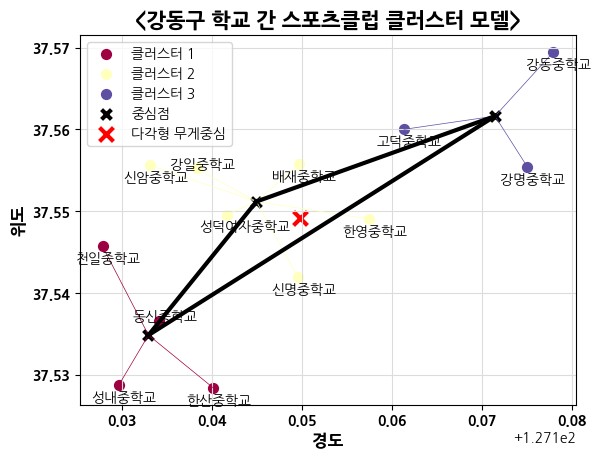

[['동신중학교', '성내중학교', '한산중학교', '천일중학교'], ['성덕여자중학교', '배재중학교', '강일중학교', '신명중학교', '신암중학교', '한영중학교'], ['강명중학교', '강동중학교', '고덕중학교']]


,동신중학교,성내중학교,한산중학교,천일중학교
0,레슬링,족구,축구,배드민턴
1,365+체육온활동,츄크볼,0,배구
2,0,0,0,방송댄스
3,0,0,0,3x3 농구


In [93]:
result("강동구", 0, tf=True)

# 외부 체육 시설과의 연계

In [94]:
sports00_df = pd.read_csv("전국공공체육시설.csv", encoding="utf-8")
sports00_df = sports00_df.fillna(0)
sports00_df.head(3)

,시설명,자치구,경도,위도,지역 스포츠클럽1,지역 스포츠클럽2
0,흑석체육센터,동작구,126.963472,37.510056,"아쿠아핏, 아쿠아로빅, 헬스, PT, 탁구, 배드민턴, 농구, 축구, 검도, 라인댄...",0
1,효창종합사회복지관,용산구,126.963017,37.541223,0,0
2,효창운동장,용산구,126.961455,37.543349,0,0


In [95]:
sports00_df[sports00_df["자치구"] == "강동구"].reset_index(drop=True)

,시설명,자치구,경도,위도,지역 스포츠클럽1,지역 스포츠클럽2
0,해공체육문화센터,강동구,127.129832,37.542094,배드민턴,0
1,일자산제2체육관,강동구,127.149703,37.529360,"헬스, 탁구",0
2,일자산제1체육관,강동구,127.151358,37.533019,배드민턴,0
3,강동유소년스포츠센터,강동구,127.174232,37.555286,"플라잉요가, 수영, 아쿠아, 바디핏","발레, 인라인스케이트, 테니스"
4,온조대왕문화체육관,강동구,127.157454,37.556725,"헬스, 수영, 아쿠아, 스피닝","발레, 인라인스케이트, 피클볼, 테니스"
5,샘터배드민턴장,강동구,127.265434,36.497877,배드민턴,0
6,강일테니스장,강동구,127.129850,37.562922,테니스,0
7,명일테니스장,강동구,127.164006,37.551228,테니스,0


In [96]:
tmp = sports00_df[sports00_df["자치구"] == "강동구"].reset_index(drop=True)
tmp[ (tmp.index == 2) | (tmp.index == 3) | (tmp.index == 4)].reset_index(drop=True)

,시설명,자치구,경도,위도,지역 스포츠클럽1,지역 스포츠클럽2
0,일자산제1체육관,강동구,127.151358,37.533019,배드민턴,0
1,강동유소년스포츠센터,강동구,127.174232,37.555286,"플라잉요가, 수영, 아쿠아, 바디핏","발레, 인라인스케이트, 테니스"
2,온조대왕문화체육관,강동구,127.157454,37.556725,"헬스, 수영, 아쿠아, 스피닝","발레, 인라인스케이트, 피클볼, 테니스"


In [97]:
sports00_df[sports00_df["자치구"] == "강동구"].reset_index(drop=True).head(3)

,시설명,자치구,경도,위도,지역 스포츠클럽1,지역 스포츠클럽2
0,해공체육문화센터,강동구,127.129832,37.542094,배드민턴,0
1,일자산제2체육관,강동구,127.149703,37.529360,"헬스, 탁구",0
2,일자산제1체육관,강동구,127.151358,37.533019,배드민턴,0


In [114]:
location00("강동구")

,시설명,자치구,경도,위도,지역 스포츠클럽1,지역 스포츠클럽2
0,해공체육문화센터,강동구,127.129832,37.542094,배드민턴,0
1,일자산제2체육관,강동구,127.149703,37.529360,"헬스, 탁구",0
2,일자산제1체육관,강동구,127.151358,37.533019,배드민턴,0
3,강동유소년스포츠센터,강동구,127.174232,37.555286,"플라잉요가, 수영, 아쿠아, 바디핏","발레, 인라인스케이트, 테니스"
4,온조대왕문화체육관,강동구,127.157454,37.556725,"헬스, 수영, 아쿠아, 스피닝","발레, 인라인스케이트, 피클볼, 테니스"
5,샘터배드민턴장,강동구,127.265434,36.497877,배드민턴,0
6,강일테니스장,강동구,127.129850,37.562922,테니스,0
7,명일테니스장,강동구,127.164006,37.551228,테니스,0


In [98]:
def location00(gu):
    location00_df = sports00_df[sports00_df["자치구"] == gu]
    location00_df = location00_df.reset_index(drop=True)
    
    return location00_df

In [99]:
# 모든 클러스터에 존재하냐?
def every_cluster(gu):

    every_cluster_df = pd.DataFrame()
    cluster_school_lst = []

    for idx in range(list(optimum[optimum["자치구"] == gu]["k"])[0]):
        table, club, facility = result(gu, idx, tool=True)
    
        tmp_school_lst = []
    
        for i in table.columns:
            for j in table.index:
                value = table.at[j, i]
                if value != 0 and value != "365+체육온활동":
                    every_cluster_df.at[value, f"클러스터{idx+1}"] = 1
            tmp_school_lst.append(i)
                
        cluster_school_lst.append(tmp_school_lst)
                
    every_cluster_df = every_cluster_df.fillna(0)

    for col in every_cluster_df.columns:
        every_cluster_df[col] = every_cluster_df[col].astype(int)
    
    for idx, col_name in enumerate(list(every_cluster_df.columns)):
        for school in cluster_school_lst[idx]:
            every_cluster_df[school] = every_cluster_df[col_name]
        every_cluster_df = every_cluster_df.drop([col_name], axis=1)
        
    return every_cluster_df

In [100]:
# 모든 학교에 스포츠클럽으로 존재하냐?
def every_club(gu):
    for idx in range(list(optimum[optimum["자치구"] == gu]["k"])[0]):
        table, club, facility = result(gu, idx, tool=True)
    
        if idx == 0:
            every_club_df = club
        elif idx > 0:
            for i in club.index:
                for j in club.columns:
                    if club.at[i, j] == 1:
                        every_club_df.at[i, j] = 1
                    
    every_club_df = every_club_df.fillna(0)

    for school in every_club_df.columns:
        every_club_df[school] = every_club_df[school].astype(int)
    
    try:
        every_club_df = every_club_df.drop(["365+체육온활동"])
    except KeyError:
        pass

    return every_club_df

In [101]:
# 모든 학교에 시설로 존재하냐?

def every_facility(gu):
    for idx in range(list(optimum[optimum["자치구"] == gu]["k"])[0]):
        table, club, facility = result(gu, idx, tool=True)
    
        if idx == 0:
            every_facility_df = facility.copy()
        elif idx > 0:
            for i in facility.index:
                for j in facility.columns:
                    if facility.at[i, j] == 1:
                        every_facility_df.at[i, j] = 1
                    
    every_facility_df = every_facility_df.fillna(0)

    for school in every_facility_df.columns:
        every_facility_df[school] = every_facility_df[school].astype(int)
    
    drop_lst = ["체조실", "체력단련장"]

    try:
        every_facility_df = every_facility_df.drop(drop_lst)
    except ( KeyError or ValueError ):
        pass

    dict_index = dict(zip(list(every_facility_df.index), recommend(list(every_facility_df.index))))
    every_facility_df = every_facility_df.rename(index=dict_index)

    return every_facility_df

In [102]:
def every_school(every_cluster_df, every_club_df, every_facility_df):
    every_school_df = every_cluster_df.copy()

    for idx in every_club_df.index:
        for col in every_club_df.columns:
            if every_club_df.at[idx, col] == 1:
                every_school_df.at[idx, col] = 1
            
    for idx in every_facility_df.index:
        for col in every_facility_df.columns:
            if every_facility_df.at[idx, col] == 1:
                every_school_df.at[idx, col] = 1
            
    every_school_df = every_school_df.fillna(0)
 
    for school in every_school_df.columns:
        every_school_df[school] = every_school_df[school].astype(int)
    
    return every_school_df

In [103]:
def len_every_school_sports(every_school_df):
    every_school_sports_lst = []
    for idx, row in every_school_df.iterrows():
        if row.sum() == 1:
            every_school_sports_lst.append(idx)
        
    return every_school_sports_lst

In [104]:
def del_every_school_sports(location00_df, every_school_sports_lst):
    for idx in location00_df.index:
        if location00_df.at[idx, "지역 스포츠클럽1"] != 0:
            row_lst1 = list(location00_df.at[idx, "지역 스포츠클럽1"].split(', '))
        
            del_value = []
            for value in row_lst1:
                if value in every_school_sports_lst:
                    del_value.append(value)
                    
            if len(del_value) > 0:
                for value in del_value:
                    del(row_lst1[row_lst1.index(value)])
                    
                location00_df.at[idx, "지역 스포츠클럽1"] = ', '.join(row_lst1)
                
    return location00_df

In [105]:
def combine_sportsclub(location00_df):
    del_idx = []
    for idx, row in location00_df.iterrows():
        if row["지역 스포츠클럽1"] != 0:
            row_lst1 = list(row["지역 스포츠클럽1"].split(', '))
        else:
            row_lst1 = []
        
        if row["지역 스포츠클럽2"] != 0:
            row_lst2 = list(row["지역 스포츠클럽2"].split(', '))
        else:
            row_lst2 = []
    
        row_lst = row_lst1 + row_lst2
        
        if len(row_lst) > 0:
            location00_df.at[idx, "지역 스포츠클럽"] = ', '.join(row_lst)
        elif len(row_lst) == 0:
            del_idx.append(idx)
         
    if len(del_idx) > 0:
        location00_df = location00_df.drop(del_idx)
        
    for idx, row in location00_df.iterrows():
        location00_df.at[idx, "지역 스포츠클럽 수"] = len(row["지역 스포츠클럽"].split(', '))
        
    location00_df["지역 스포츠클럽 수"] = location00_df["지역 스포츠클럽 수"].astype(int)
    
    return location00_df.sort_values(by="지역 스포츠클럽 수", ascending=True).reset_index(drop=True)

In [106]:
def centroid(location00_df, gu):
    centroid_df = result(gu, 0, centroid=True)
    centroid_lst = [centroid_df["중심점(위도)"].mean(), centroid_df["중심점(경도)"].mean()]
    
    location00_df["클러스터 무게 중심(경도)"] = [centroid_lst[1] for _ in range(len(location00_df))]
    location00_df["클러스터 무게 중심(위도)"] = [centroid_lst[0] for _ in range(len(location00_df))]
    
    location00_df["차(경도)"] = location00_df["클러스터 무게 중심(경도)"] - location00_df["경도"]
    location00_df["차(위도)"] = location00_df["클러스터 무게 중심(위도)"] - location00_df["위도"]
    
    location00_df["차 제곱(경도)"] = location00_df["차(경도)"] * location00_df["차(경도)"]
    location00_df["차 제곱(위도)"] = location00_df["차(위도)"] * location00_df["차(위도)"]
    
    for idx, row in location00_df.iterrows():
        location00_df.at[idx, "유클리드 거리"] = math.sqrt( row["차 제곱(경도)"] + row["차 제곱(위도)"] )
    
    location00_df = location00_df.sort_values(by=["지역 스포츠클럽 수", "유클리드 거리"], ascending=True).reset_index(drop=True)
    
    return location00_df[["시설명", "자치구", "경도", "위도", "지역 스포츠클럽", "지역 스포츠클럽 수", "유클리드 거리"]]

In [107]:
def final_table00(location00_df):
    for idx, row in location00_df.iterrows():
        if idx == 0:
            unique_sportsclub_lst = row["지역 스포츠클럽"].split(', ')
        elif idx > 0:
            unique_sportsclub_lst = location00_df.at[idx, "지역 스포츠클럽"].split(', ')
        
#         if idx == 7:
#             return location00_df
    
        for value in unique_sportsclub_lst:
            for idx2, row2 in location00_df[location00_df["시설명"] != location00_df.at[idx, "시설명"]].iterrows():
                row_lst = row2["지역 스포츠클럽"].split(', ')
                if value in row_lst:
                    del(row_lst[row_lst.index(value)])
                    location00_df.at[idx2, "지역 스포츠클럽"] = ', '.join(row_lst)
            
        for idx2, row2 in location00_df.iterrows():
            if row2["지역 스포츠클럽"] == '':
                location00_df.at[idx2, "지역 스포츠클럽 수"] = 0
            
            else:
                location00_df.at[idx2, "지역 스포츠클럽 수"] = len(row2["지역 스포츠클럽"].split(', '))
    
        location00_df["지역 스포츠클럽 수"] = location00_df["지역 스포츠클럽 수"].astype(int)    
        location00_df = location00_df.sort_values(by=["지역 스포츠클럽 수", "유클리드 거리"], ascending=True).reset_index(drop=True)
      
    del_idx_lst = []
    for idx, row in location00_df.iterrows():
        if row["지역 스포츠클럽 수"] == 0:
            del_idx_lst.append(idx)
        
    if del_idx_lst != []:
        location00_df = location00_df.drop(del_idx_lst).reset_index(drop=True)

    return location00_df[["시설명", "지역 스포츠클럽"]]

In [108]:
def style_result00(final_table, importance_lst1, importance_lst2):
    styles = []
    
    for idx in final_table.index:
        for col in final_table.columns:
            if final_table.at[idx, col] in importance_lst1:
                styles.append({'selector': f'td.row{final_table.index.get_loc(idx)}.col{final_table.columns.get_loc(col)}', 'props': [('color', 'red')]})
            elif final_table.at[idx, col] in importance_lst2:
                styles.append({'selector': f'td.row{final_table.index.get_loc(idx)}.col{final_table.columns.get_loc(col)}', 'props': [('color', 'blue')]})
            
    styled_table = final_table.style.set_table_styles(styles)
    
    return styled_table

In [128]:
def result00(gu):
    location00_df = location00(gu)
    
    every_cluster_df = every_cluster(gu)
    every_club_df = every_club(gu)
    every_facility_df = every_facility(gu)
    
    every_school_df = every_school(every_cluster_df, every_club_df, every_facility_df)
    
    return every_school_df
    
    every_school_sports_lst = len_every_school_sports(every_school_df)
    
    if len(every_school_sports_lst) > 0:
        location00_df = del_every_school_sports(every_school_sports_lst)
        
    location00_df = combine_sportsclub(location00_df)
    
    importance_lst1 = []
    importance_lst2 = []
    for idx, row in location00_df.iterrows():
        if row["지역 스포츠클럽1"] != 0:
            importance_lst1 = list(set(importance_lst1 + list(row["지역 스포츠클럽1"].split(', '))))
        if row["지역 스포츠클럽2"] != 0:
            importance_lst2 = list(set(importance_lst2 + list(row["지역 스포츠클럽2"].split(', '))))
    
    location00_df = centroid(location00_df, gu)
    
    location00_df = final_table00(location00_df)
    
    max_cnt = 0
    for idx, row in location00_df.iterrows():
        lst = list(row["지역 스포츠클럽"].split(', '))
        if max_cnt < len(lst):
            max_cnt = len(lst)
            
    for idx, row in location00_df.iterrows():
        lst = list(row["지역 스포츠클럽"].split(', '))
        while max_cnt > len(lst):
            lst.append(0)
        location00_df.at[idx, "지역 스포츠클럽"] = lst
    
    df = pd.DataFrame()
    
    for idx, row in location00_df.iterrows():
        lst = row["지역 스포츠클럽"]
        for i, value in enumerate(lst):
            df.at[i, row["시설명"]] = value
            
    style_df = style_result00(df, importance_lst1, importance_lst2)
    
    return style_df

In [130]:
df = result00("강동구")

C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\1885528713.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels


[['동신중학교', '성내중학교', '한산중학교', '천일중학교'], ['성덕여자중학교', '배재중학교', '강일중학교', '신명중학교', '신암중학교', '한영중학교'], ['강명중학교', '강동중학교', '고덕중학교']]


C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\1885528713.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels


[['동신중학교', '성내중학교', '한산중학교', '천일중학교'], ['성덕여자중학교', '배재중학교', '강일중학교', '신명중학교', '신암중학교', '한영중학교'], ['강명중학교', '강동중학교', '고덕중학교']]


C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\1885528713.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels


[['동신중학교', '성내중학교', '한산중학교', '천일중학교'], ['성덕여자중학교', '배재중학교', '강일중학교', '신명중학교', '신암중학교', '한영중학교'], ['강명중학교', '강동중학교', '고덕중학교']]


C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\1885528713.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels


[['동신중학교', '성내중학교', '한산중학교', '천일중학교'], ['성덕여자중학교', '배재중학교', '강일중학교', '신명중학교', '신암중학교', '한영중학교'], ['강명중학교', '강동중학교', '고덕중학교']]


C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\1885528713.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels


[['동신중학교', '성내중학교', '한산중학교', '천일중학교'], ['성덕여자중학교', '배재중학교', '강일중학교', '신명중학교', '신암중학교', '한영중학교'], ['강명중학교', '강동중학교', '고덕중학교']]


C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\1885528713.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels
C:\Users\snu29\anaconda3\Lib\site-pac

[['동신중학교', '성내중학교', '한산중학교', '천일중학교'], ['성덕여자중학교', '배재중학교', '강일중학교', '신명중학교', '신암중학교', '한영중학교'], ['강명중학교', '강동중학교', '고덕중학교']]


C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\1885528713.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels


[['동신중학교', '성내중학교', '한산중학교', '천일중학교'], ['성덕여자중학교', '배재중학교', '강일중학교', '신명중학교', '신암중학교', '한영중학교'], ['강명중학교', '강동중학교', '고덕중학교']]


C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\1885528713.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels


[['동신중학교', '성내중학교', '한산중학교', '천일중학교'], ['성덕여자중학교', '배재중학교', '강일중학교', '신명중학교', '신암중학교', '한영중학교'], ['강명중학교', '강동중학교', '고덕중학교']]


C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\snu29\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\snu29\AppData\Local\Temp\ipykernel_67280\1885528713.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_cluster_df["cluster_num"] = labels


[['동신중학교', '성내중학교', '한산중학교', '천일중학교'], ['성덕여자중학교', '배재중학교', '강일중학교', '신명중학교', '신암중학교', '한영중학교'], ['강명중학교', '강동중학교', '고덕중학교']]


In [131]:
df

,동신중학교,성내중학교,한산중학교,천일중학교,성덕여자중학교,배재중학교,강일중학교,신명중학교,신암중학교,한영중학교,강명중학교,강동중학교,고덕중학교
레슬링,1,1,1,1,0,0,0,0,0,0,0,0,0
족구,1,1,1,1,1,1,1,1,1,1,0,0,0
츄크볼,1,1,1,1,0,0,0,0,0,0,0,0,0
축구,1,1,1,1,0,1,1,1,0,0,1,1,1
배드민턴,1,1,1,1,0,0,1,1,0,1,1,1,1
배구,1,1,1,1,1,1,1,1,1,1,1,1,1
방송댄스,1,1,1,1,0,0,0,0,0,0,0,0,0
3x3 농구,1,1,1,1,0,0,0,0,0,0,0,0,0
테니스,0,0,0,0,1,1,1,1,1,1,0,0,0
넷볼,0,0,0,0,1,1,1,1,1,1,1,1,1


In [ ]:
result("강동구", 0, tf=True)